# **Transforming Data into Actional Insights: Unveiling Customer Churn in the Telecom Sector**

This project is focused on leveraging data-driven insights to enhance customer retention by targeting high-value customers and identifying potential churn risks. The primary challenge is the company’s high customer churn rate, which is causing significant revenue losses and demands a thorough analysis to reveal the underlying factors. To tackle this, we will undertake a comprehensive analytical approach to better understand customer churn in the Telecom Company.

The process will begin with an in-depth analysis of the dataset, focusing on critical elements such as customer demographics, service duration, billing habits, popular subscriptions, preferred offers, and additional services. Data visualization will be essential in this phase, using various graphs and charts to clarify the root causes of churn, allowing us to spot trends and patterns across different customer segments. This will empower stakeholders with deeper insights into customer behavior.

To guarantee the reliability of our findings, we will utilize statistical techniques, including t-tests and regression analysis, to rigorously test hypotheses and identify the factors contributing to customer churn. We will also deploy machine learning models such as Logistic Regression, Random Forest, Gradient Boosting, and XGBoost to accurately predict churn, uncover key drivers, and formulate effective strategies to enhance retention. These models will help us capture complex interactions within the data, leading to improved churn predictions and reduction efforts.

## **Importing Modules**

In [66]:
# Data Loading and Manipulation modules
import numpy as np
import pandas as pd


# Visualisation Modules and Set the 'ggplot' style
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

# Data preparing, machine learning and metrics modules.
from scipy.stats.mstats import winsorize
from scipy.stats import ttest_ind
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler #log reg scalar
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, matthews_corrcoef, roc_curve, auc
from sklearn.model_selection import cross_val_score, KFold


## **Data Loading**

In [67]:
df=pd.read_csv('Customer Churn Dataset.csv') #load data

## **Overview of the Data**

In [68]:
df.head() # print 5 rows of data

Customer ID  Gender  Age Married  Number of Dependents          City  \
0  0002-ORFBO  Female   37     Yes                     0  Frazier Park   
1  0003-MKNFE    Male   46      No                     0      Glendale   
2  0004-TLHLJ    Male   50      No                     0    Costa Mesa   
3  0011-IGKFF    Male   78     Yes                     0      Martinez   
4  0013-EXCHZ  Female   75     Yes                     0     Camarillo   

   Zip Code   Latitude   Longitude  Number of Referrals  ...   Payment Method  \
0     93225  34.827662 -118.999073                    2  ...      Credit Card   
1     91206  34.162515 -118.203869                    0  ...      Credit Card   
2     92627  33.645672 -117.922613                    0  ...  Bank Withdrawal   
3     94553  38.014457 -122.115432                    1  ...  Bank Withdrawal   
4     93010  34.227846 -119.079903                    3  ...      Credit Card   

  Monthly Charge Total Charges  Total Refunds Total Extra Data Charges  \
0           65.6        593.30           0.00                        0   
1           -4.0        542.40          38.33                       10   
2           73.9        280.85           0.00                        0   
3           98.0       1237.85           0.00                        0   
4           83.9        267.40           0.00                        0   

  Total Long Distance Charges Total Revenue  Customer Status   Churn Category  \
0                      381.51        974.81           Stayed              NaN   
1                       96.21        610.28           Stayed              NaN   
2                      134.60        415.45          Churned       Competitor   
3                      361.66       1599.51          Churned  Dissatisfaction   
4                       22.14        289.54          Churned  Dissatisfaction   

                    Churn Reason  
0                            NaN  
1                            NaN  
2  Competitor had better devices  
3        Product dissatisfaction  
4            Network reliability  

[5 rows x 38 columns]

Checking all columns in the dataset

In [69]:
df.columns # data columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')

Printing the unique values for each categorical column in the given DataFrame.

In [70]:
def show_unique_vals(df): # print uniques values of categorical columns
    for col in df:
        # Check if the column's data type is 'object' (categorical)
        if df[col].dtype == 'object':
            # Print the column name and its unique values
            unique_vals = df[col].unique()
            print(f"{col}: {unique_vals}")

In [71]:
show_unique_vals(df)

Customer ID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Gender: ['Female' 'Male']
Married: ['Yes' 'No']
City: ['Frazier Park' 'Glendale' 'Costa Mesa' ... 'Jacumba' 'Carpinteria'
 'Meadow Valley']
Offer: [nan 'Offer E' 'Offer D' 'Offer A' 'Offer B' 'Offer C']
Phone Service: ['Yes' 'No']
Multiple Lines: ['No' 'Yes' nan]
Internet Service: ['Yes' 'No']
Internet Type: ['Cable' 'Fiber Optic' 'DSL' nan]
Online Security: ['No' 'Yes' nan]
Online Backup: ['Yes' 'No' nan]
Device Protection Plan: ['No' 'Yes' nan]
Premium Tech Support: ['Yes' 'No' nan]
Streaming TV: ['Yes' 'No' nan]
Streaming Movies: ['No' 'Yes' nan]
Streaming Music: ['No' 'Yes' nan]
Unlimited Data: ['Yes' 'No' nan]
Contract: ['One Year' 'Month-to-Month' 'Two Year']
Paperless Billing: ['Yes' 'No']
Payment Method: ['Credit Card' 'Bank Withdrawal' 'Mailed Check']
Customer Status: ['Stayed' 'Churned' 'Joined']
Churn Category: [nan 'Competitor' 'Dissatisfaction' 'Other' 'Price' 'Attitude']
Chur

Generate a statistical summary of the data

In [72]:
df.describe() # statistical Summary of the data

Age  Number of Dependents      Zip Code     Latitude  \
count  7043.000000           7043.000000   7043.000000  7043.000000   
mean     46.509726              0.468692  93486.070567    36.197455   
std      16.750352              0.962802   1856.767505     2.468929   
min      19.000000              0.000000  90001.000000    32.555828   
25%      32.000000              0.000000  92101.000000    33.990646   
50%      46.000000              0.000000  93518.000000    36.205465   
75%      60.000000              0.000000  95329.000000    38.161321   
max      80.000000              9.000000  96150.000000    41.962127   

         Longitude  Number of Referrals  Tenure in Months  \
count  7043.000000          7043.000000       7043.000000   
mean   -119.756684             1.951867         32.386767   
std       2.154425             3.001199         24.542061   
min    -124.301372             0.000000          1.000000   
25%    -121.788090             0.000000          9.000000   
50%    -119.595293             0.000000         29.000000   
75%    -117.969795             3.000000         55.000000   
max    -114.192901            11.000000         72.000000   

       Avg Monthly Long Distance Charges  Avg Monthly GB Download  \
count                        6361.000000              5517.000000   
mean                           25.420517                26.189958   
std                            14.200374                19.586585   
min                             1.010000                 2.000000   
25%                            13.050000                13.000000   
50%                            25.690000                21.000000   
75%                            37.680000                30.000000   
max                            49.990000                85.000000   

       Monthly Charge  Total Charges  Total Refunds  Total Extra Data Charges  \
count     7043.000000    7043.000000    7043.000000               7043.000000   
mean        63.596131    2280.381264       1.962182                  6.860713   
std         31.204743    2266.220462       7.902614                 25.104978   
min        -10.000000      18.800000       0.000000                  0.000000   
25%         30.400000     400.150000       0.000000                  0.000000   
50%         70.050000    1394.550000       0.000000                  0.000000   
75%         89.750000    3786.600000       0.000000                  0.000000   
max        118.750000    8684.800000      49.790000                150.000000   

       Total Long Distance Charges  Total Revenue  
count                  7043.000000    7043.000000  
mean                    749.099262    3034.379056  
std                     846.660055    2865.204542  
min                       0.000000      21.360000  
25%                      70.545000     605.610000  
50%                     401.440000    2108.640000  
75%                    1191.100000    4801.145000  
max                    3564.720000   11979.340000

In [73]:
df.info() # data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              3166 non-null   objec

## **Data Pre-processing**

### **Identifying Missing/Null Values and Visualising**

In [74]:
# Calculate the count of missing values
null_values_count = df.isnull().sum()

# Generate a bar chart to visualize missing values
plt.figure(figsize=(12, 6))
null_values_count.plot(kind='bar', color='skyblue')
plt.title('Missing Values Count by Column')
plt.xticks(rotation=90)
plt.xlabel('Column Names')
plt.ylabel('Count of Missing Values')

plt.show()


### **Cleaning Missing Values**

For categorical columns, we fill in missing values with 'No', 'None', or 'Other' for categorical columns.

For numerical columns, the mean value is used.

In [75]:
# Handle missing values for numeric columns
df['Avg Monthly Long Distance Charges'].fillna(df['Avg Monthly Long Distance Charges'].mean(), inplace=True)
df['Avg Monthly GB Download'].fillna(df['Avg Monthly GB Download'].mean(), inplace=True)

# Handle missing values for categorical columns
df['Multiple Lines'].fillna('No', inplace=True)
df['Internet Type'].fillna('None', inplace=True)
df['Online Security'].fillna('No', inplace=True)
df['Online Backup'].fillna('No', inplace=True)
df['Device Protection Plan'].fillna('No', inplace=True)
df['Premium Tech Support'].fillna('No', inplace=True)
df['Streaming TV'].fillna('No', inplace=True)
df['Streaming Movies'].fillna('No', inplace=True)
df['Streaming Music'].fillna('No', inplace=True)
df['Unlimited Data'].fillna('No', inplace=True)
df['Churn Category'].fillna('Other', inplace=True)


### **Identifying Duplicate Values**

In [76]:
duplicate_rows = df[df.duplicated()]
print(f"Total duplicate rows found: {duplicate_rows.shape[0]}")



Total duplicate rows found: 0


### **Identifying Outliers**

**Important Note:**

After careful consideration, we opted to retain the outliers in our customer churn dataset, as this approach proved to be more advantageous. These outliers were not extreme or overly prominent, and they significantly contributed to key statistics such as total revenue. Removing them would have led to an inaccurate representation of the data, visualisations and analysis and ineffective algorithms in this case. Moreover, keeping these outliers enhanced our machine learning model's accuracy by providing critical data points, particularly in predicting customer churn, and played a crucial role in identifying key features since the outliers would improve their weight. The outliers provided valuable insights into critical customer behaviors, including high-value and edge cases, making them essential for informed business decisions.

Therefore, In this section I show how I effectively remove the outliers in a copy of the dataframe named 'df_outliers', however after this section, I continue with the cleaned dataframe containing the outliers named 'df' since this way the analysis and predictive algorithms contain business relevance.

In [77]:
#Duplicate a new dataframe just to handle outliers, I am not
df_outliers = df.copy()

In [78]:
# Create a box plot using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_outliers, palette='Set2')
plt.title('Box Plot with Outliers', fontsize = 18)
plt.xlabel('Columns', fontsize = 16)
plt.ylabel('Values', fontsize = 16)
plt.xticks(rotation=90, fontsize = 16)
plt.yticks(fontsize = 16)
plt.show()

In [79]:
# Assuming 'data' is your DataFrame and you want to plot specific numerical columns
numerical_columns = [
    'Avg Monthly GB Download', 'Total Revenue', 'Monthly Charge',
    'Number of Dependents', 'Number of Referrals', 'Total Long Distance Charges'
]

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, i)
    sns.boxplot(x=df_outliers[col])
    plt.title(f'Box Plot of {col}', fontsize=18)
    plt.xlabel(col, fontsize=16)
    plt.xticks(fontsize=14)  # Increase x-axis tick font size
    plt.yticks(fontsize=14)  # Increase y-axis tick font size
plt.tight_layout()
plt.show()

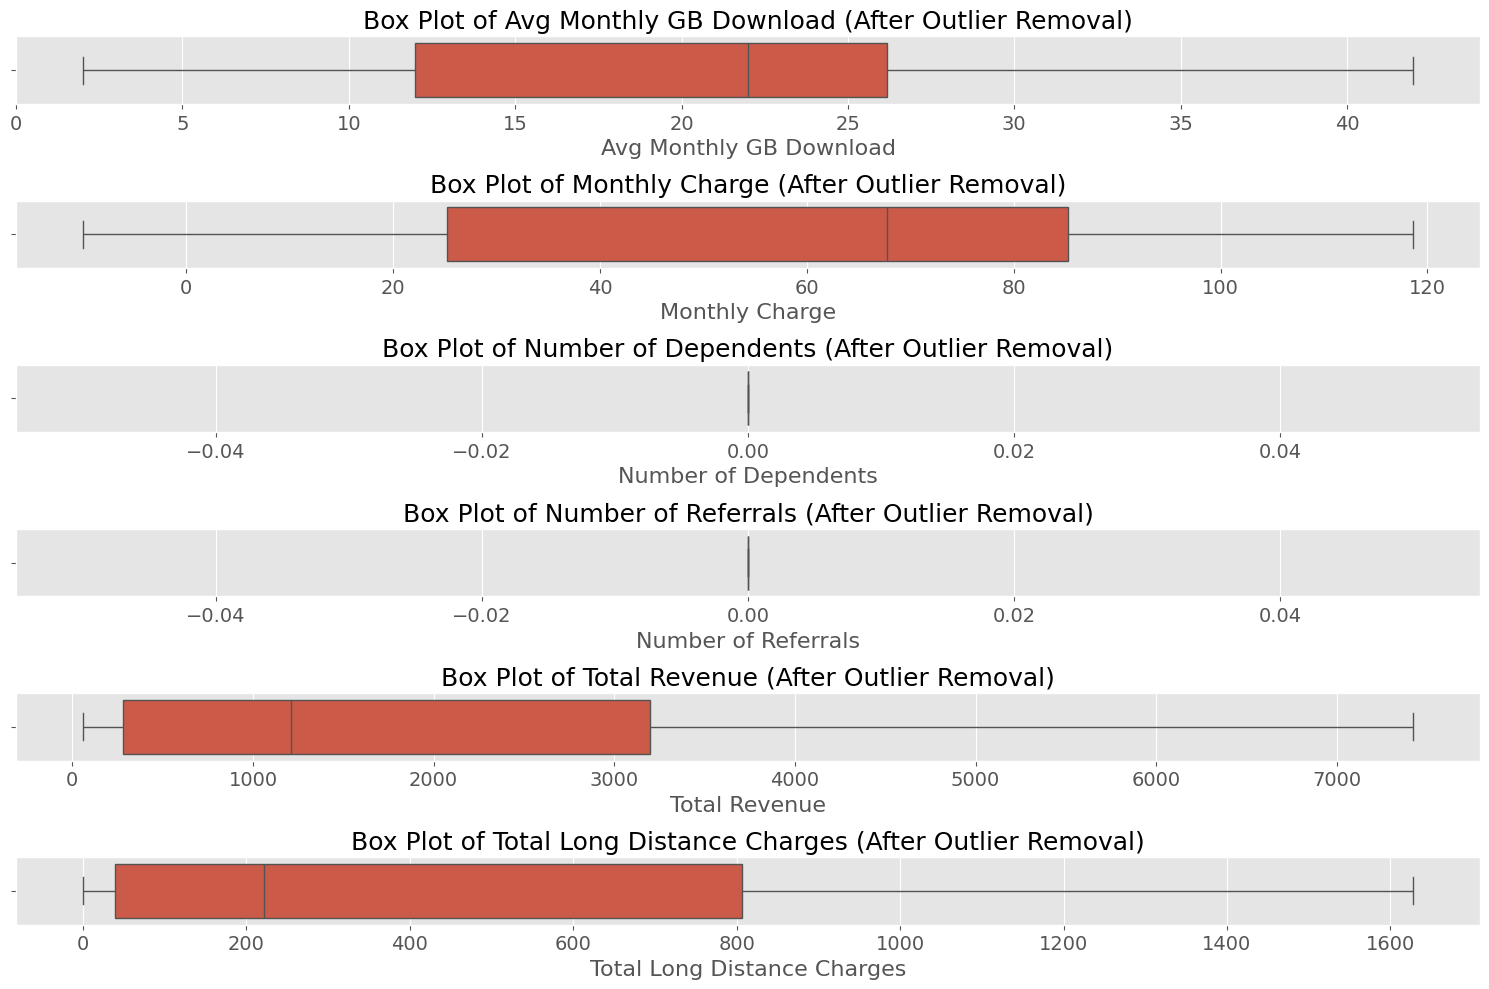

In [80]:
# Function to remove outliers
def remove_outliers(df_outliers, columns):
    for column in columns:
        Q1 = df_outliers[column].quantile(0.25)
        Q3 = df_outliers[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_outliers = df_outliers[(df_outliers[column] >= lower_bound) & (df_outliers[column] <= upper_bound)]
    return df_outliers

# Function to remove outliers for a single column multiple times
def remove_outliers_multiple_rounds(df_outliers, column, rounds=2):
    for _ in range(rounds):
        Q1 = df_outliers[column].quantile(0.25)
        Q3 = df_outliers[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_outliers = df_outliers[(df_outliers[column] >= lower_bound) & (df_outliers[column] <= upper_bound)]
    return df_outliers

# Apply Winsorization to 'Total Revenue' and 'Total Long Distance Charges'
def winsorize_column(df_outliers, column, limits):
    df_outliers[column] = winsorize(df_outliers[column], limits=limits)
    return df_outliers

# Specify the columns where you want to remove outliers
columns_to_check = [
    'Avg Monthly GB Download', 'Monthly Charge',
    'Number of Dependents', 'Number of Referrals'
]

# Apply the function to remove outliers
df_outliers = remove_outliers(df_outliers, columns_to_check[:-1])

# Apply two rounds of outlier removal to "Number of Referrals"
df_outliers = remove_outliers_multiple_rounds(df_outliers, 'Number of Referrals', rounds=2)

# Apply Winsorization to 'Total Revenue'
df_outliers = winsorize_column(df_outliers, 'Total Revenue', limits=[0.05, 0.05])

# Apply capping to 'Total Long Distance Charges'
upper_limit = df_outliers['Total Long Distance Charges'].quantile(0.90)
df_outliers['Total Long Distance Charges'] = df_outliers['Total Long Distance Charges'].clip(upper=upper_limit)

# Plot the boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_to_check + ['Total Revenue', 'Total Long Distance Charges'], 1):
    plt.subplot(6, 1, i)
    sns.boxplot(x=df_outliers[col])
    plt.title(f'Box Plot of {col} (After Outlier Removal)', fontsize=18)  # Increase title font size
    plt.xlabel(col, fontsize=16)  # Increase xlabel font size
    plt.xticks(fontsize=14)  # Increase x-axis tick font size
    plt.yticks(fontsize=14)  # Increase y-axis tick font size

plt.tight_layout()
plt.show()


The machine learning algorithms such as tree-based models like XGBoost or Random Forest are generally more robust to outliers.

The outliers show business relevance, and if the outliers represent real, significant cases (e.g., high-value customers), they might provide valuable insights, and removing them could lose important information.


In summary, outliers in no shape or form significantly skew the model or misrepresent the data, they are legitimate and informative, so they might be worth retaining. Thus since there are no prominent outliers so we continue with analysis.

## **Visualisations and Analysis**



### **Visualising the Problem**

Total Revenue: 21371131.69
|-------------------------------------|

Total Customers: 7043
|-------------------------------------|

Revenue Distribution by Customer Status:


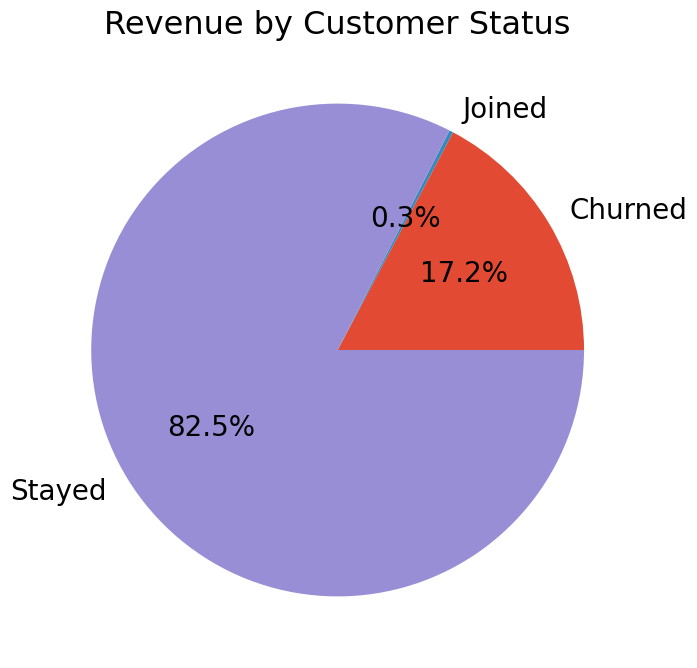

Customer Status
Churned     3684459.82
Joined        54279.75
Stayed     17632392.12
Name: Total Revenue, dtype: float64
|-------------------------------------|

Customer Count by Status:


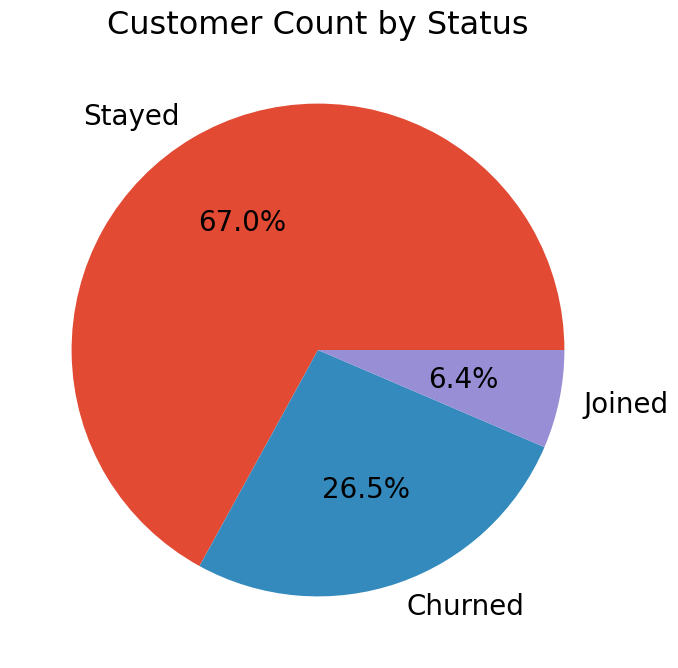

Customer Status
Stayed     4720
Churned    1869
Joined      454
Name: count, dtype: int64


In [81]:
# Calculate and display the total revenue
total_revenue = df['Total Revenue'].sum()
print(f"Total Revenue: {total_revenue}")
print('|-------------------------------------|\n')

# Calculate and display the total number of customers
total_customers = df['Customer Status'].count()
print(f"Total Customers: {total_customers}")
print('|-------------------------------------|\n')

# Display and plot the revenue distribution by customer status
print("Revenue Distribution by Customer Status:")
revenue_distribution = df.groupby('Customer Status')['Total Revenue'].sum()
revenue_distribution.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), textprops={'fontsize': 20})
plt.title('Revenue by Customer Status', fontsize=23)
plt.ylabel('')  # Hide y-label for a cleaner look
plt.show()
print(revenue_distribution)
print('|-------------------------------------|\n')

# Display and plot the count of customers by status
print("Customer Count by Status:")
customer_count_by_status = df['Customer Status'].value_counts()
customer_count_by_status.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), textprops={'fontsize': 20})
plt.title('Customer Count by Status', fontsize=23)
plt.ylabel('')  # Hide y-label for a cleaner look
plt.show()
print(customer_count_by_status)


The data reveals troubling financial and customer trends for the company. It faced a major revenue loss of $3.68 million, representing about 17.2% of its total revenue. This financial hit is accompanied by a significant customer churn rate of 26.5%, meaning the company lost 1,869 out of 7,043 customers based on this data.

### **Why Customer Churn?**

<Axes: >

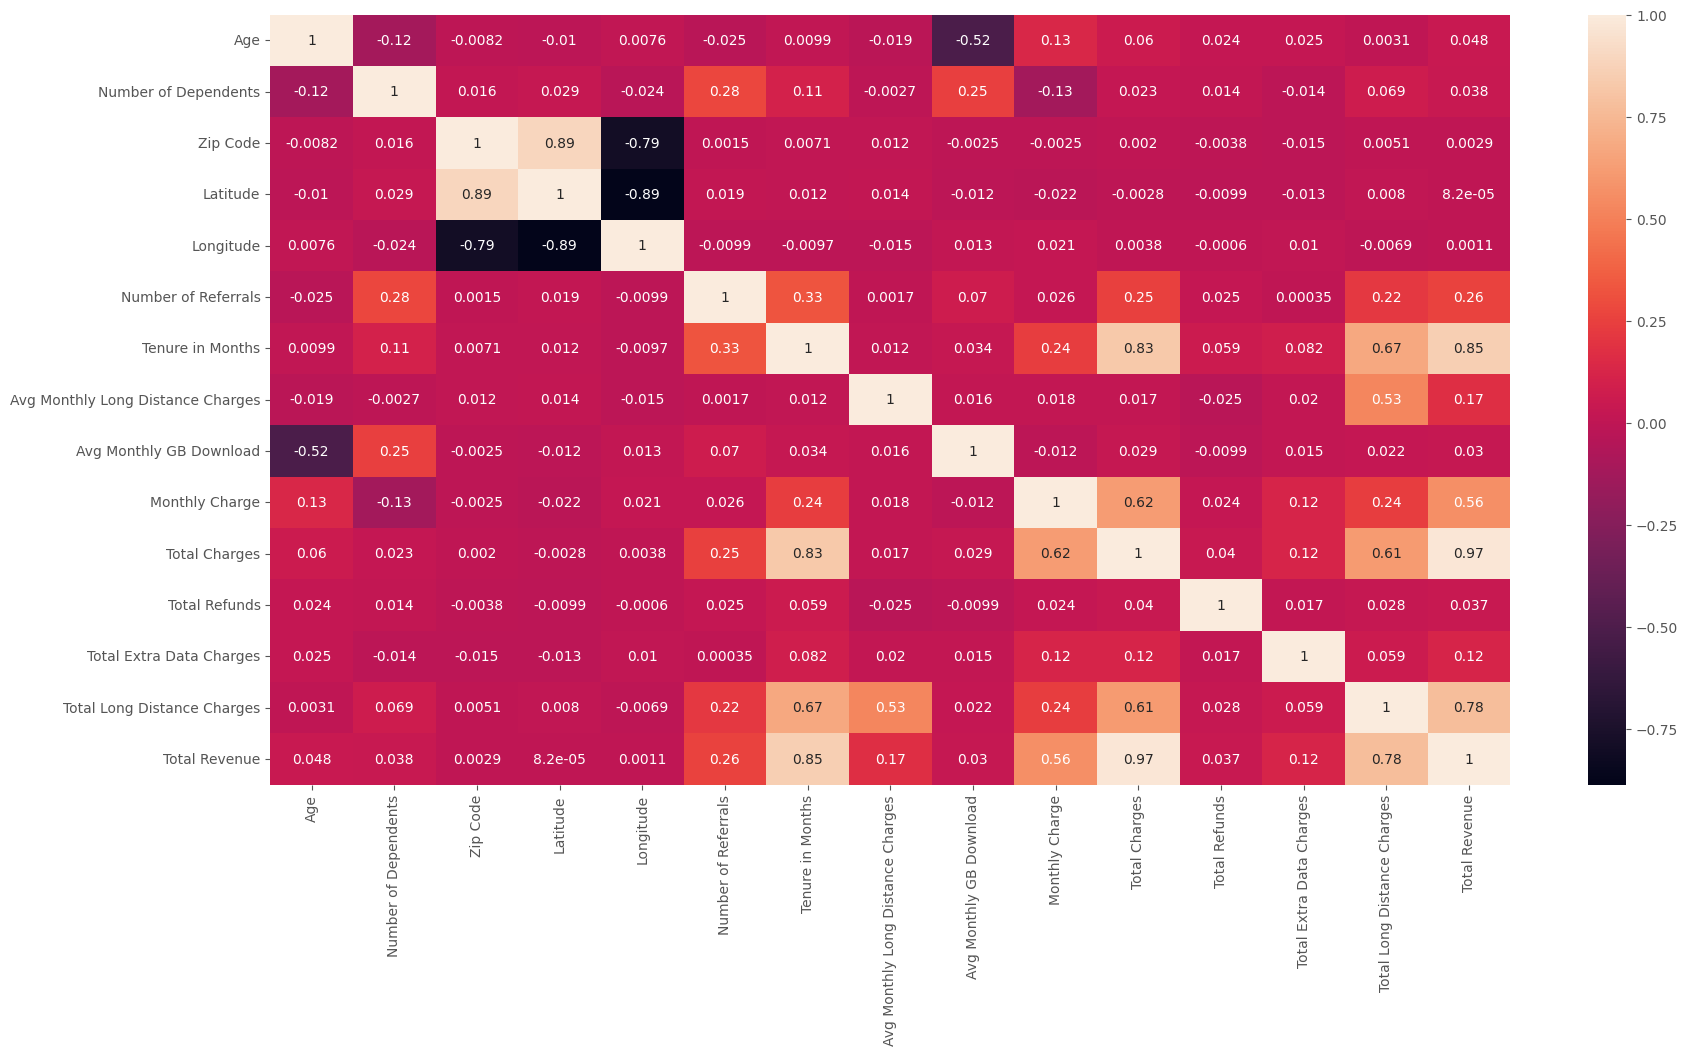

In [82]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(numeric_only=True), annot=True)

**Visualisation Insights**

This heatmap illustrates the relationships between different numerical features in the dataset. It reveals that certain variables, like "Tenure in Months" and "Total Charges," are closely linked, while others, such as "Zip Code" and "Total Long Distance Charges," show weaker or even negative connections. The intensity of the color indicates the strength of these correlations, with darker shades representing stronger ties.

In [83]:
df.groupby('Customer Status')['Monthly Charge'].describe()

count       mean        std   min      25%     50%    75%  \
Customer Status                                                               
Churned          1869.0  73.347592  26.373764 -10.0  55.3000  79.500  94.20   
Joined            454.0  42.775991  24.612329  -8.0  20.1625  43.975  64.35   
Stayed           4720.0  61.737415  32.198758 -10.0  25.1000  65.600  89.55   

                    max  
Customer Status          
Churned          118.35  
Joined           107.95  
Stayed           118.75

Customers who churn tend to pay higher monthly charges, with an average of 73.35 USD, compared to 42.78USD for new customers and 61.74USD for those who stayed. This indicates that higher monthly charges are associated with a greater likelihood of customers leaving.

In [84]:
df.groupby(['Customer Status','Gender'])['Monthly Charge'].describe()

count       mean        std   min      25%     50%  \
Customer Status Gender                                                        
Churned         Female   939.0  73.606656  26.093400 -10.0  59.6250  79.500   
                Male     930.0  73.086022  26.665339  -9.0  53.8750  79.500   
Joined          Female   211.0  43.374645  23.839314  -8.0  20.2250  44.000   
                Male     243.0  42.256173  25.301925  -8.0  20.1000  43.850   
Stayed          Female  2338.0  62.343926  32.085856 -10.0  25.2500  65.625   
                Male    2382.0  61.142107  32.304853 -10.0  25.0125  65.550   

                           75%     max  
Customer Status Gender                  
Churned         Female  93.625  117.45  
                Male    94.500  118.35  
Joined          Female  69.225   95.85  
                Male    60.800  107.95  
Stayed          Female  89.750  118.75  
                Male    89.375  118.20

The mean monthly charges for both genders within each customer status category are relatively similar.

In [85]:
df.groupby(['Customer Status'])['Tenure in Months'].describe()

count       mean        std  min   25%   50%   75%   max
Customer Status                                                           
Churned          1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0
Joined            454.0   1.720264   0.818486  1.0   1.0   1.0   2.0   3.0
Stayed           4720.0  41.041525  22.363674  4.0  21.0  42.0  63.0  72.0


* Churned customers typically have an average tenure of around 18 months, with a notable variation as indicated by a standard deviation of 19.53 months. Their tenure ranges from just 1 month to as long as 72 months.

* Recently joined customers, on the other hand, have a much shorter average tenure of about 1.7 months, with a lower standard deviation of 0.82 months, mostly staying for just 1 month and none exceeding 3 months.

* In contrast, customers who continue to stay with the company have a significantly longer average tenure of approximately 41 months, with a standard deviation of 22.36 months, spanning from 4 months to 72 months.

### **Tenure in Months against Monthly Charge**

<Axes: xlabel='Tenure in Months', ylabel='Monthly Charge'>

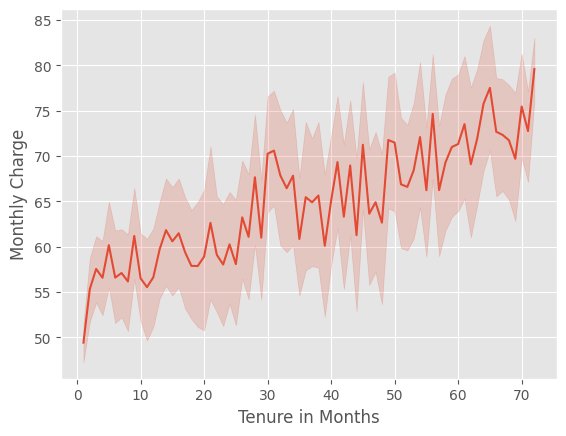

In [86]:
sns.lineplot(x='Tenure in Months',y='Monthly Charge', data=df)

* As the Tenure in Months increases, the monthly charge seems to increase.

### **Distribution of customers based on their geographic coordinates (longitude and latitude).**

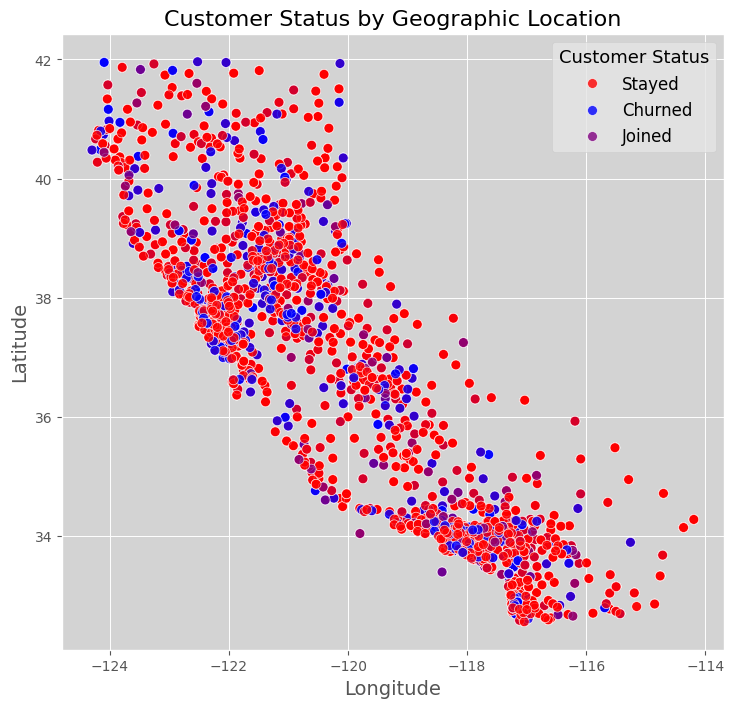

In [87]:
# Adjusting the scatter plot with the specified background and grid
plt.figure(figsize=(10, 8))

# Set the background color
plt.gca().set_facecolor('lightgrey')

# Create the scatter plot with the desired customizations
sns.scatterplot(data=df, x='Longitude', y='Latitude', hue='Customer Status',
                palette={'Stayed': 'red', 'Churned': 'blue', 'Joined': 'purple'},
                        s=50, edgecolor='white', linewidth=0.5, alpha=0.8)

# Enhance the plot with gridlines, title, and axis labels
plt.title('Customer Status by Geographic Location', fontsize=16)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)

# Customize the grid to be white
plt.grid(True, color='white', linestyle='-', linewidth=0.7)

# Adjust the aspect ratio
plt.gca().set_aspect('equal', adjustable='box')

# Display the legend with a better placement and size
plt.legend(title='Customer Status', loc='upper right', fontsize=12, title_fontsize='13')

# Display the plot
plt.show()



**Insights**

This reveals that most customers are concentrated in specific geographic areas, with the majority staying (red dots). Churned customers (blue) are also present, particularly in densely populated regions, while new customer acquisitions (purple) are fewer and scattered. This helps visualise areas with higher churn guiding targetted retention strategies. However it is not enough since this is only one telecom company based in California so we cannot derive significant determiants from location in this case.

In [88]:
churned = df.loc[df['Customer Status'] != 'Joined']

In [89]:
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 7))

# Create the count plot with a different color palette
sns.barplot(y=churned['Churn Reason'].value_counts().index,
            x=churned['Churn Reason'].value_counts().values,
            palette="husl",
            ax=ax)

# Add annotations to each bar
for i, bar in enumerate(ax.patches):
    ax.annotate(f'{int(bar.get_width())}',
                (bar.get_width() + 5, bar.get_y() + bar.get_height() / 2),
                ha='center', va='center')

# Remove axis labels
ax.set_xlabel('')
ax.set_ylabel('')

# Display the plot
plt.show()


<ipython-input-89-9eb7922c8a51>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=churned['Churn Reason'].value_counts().index,


**Insights**

* The most frequent reason for customer churn is that competitors offered better devices, with a total of 313 cases. This indicates that the quality of devices is a significant factor in customers' decision-making processes.

* The second most common reason is that a competitor provided a more attractive offer, with 311 instances. This suggests that competitor pricing and promotional deals have a considerable influence on customer churn.

* The attitude of support personnel and service providers also plays a role in customer churn, as shown by the substantial counts of 220 and 94, respectively. This underscores the importance of delivering high-quality customer service.

* It's noteworthy that only a small number of customers churn due to reasons such as being deceased or the perceived lack of expertise in phone or online support.

* These insights can be leveraged to pinpoint areas for improvement, such as upgrading device quality, optimizing pricing strategies, addressing customer service issues, and focusing on enhancing product satisfaction and network reliability. By acting on these findings, the company can work towards reducing customer churn and improving overall customer satisfaction and retention.

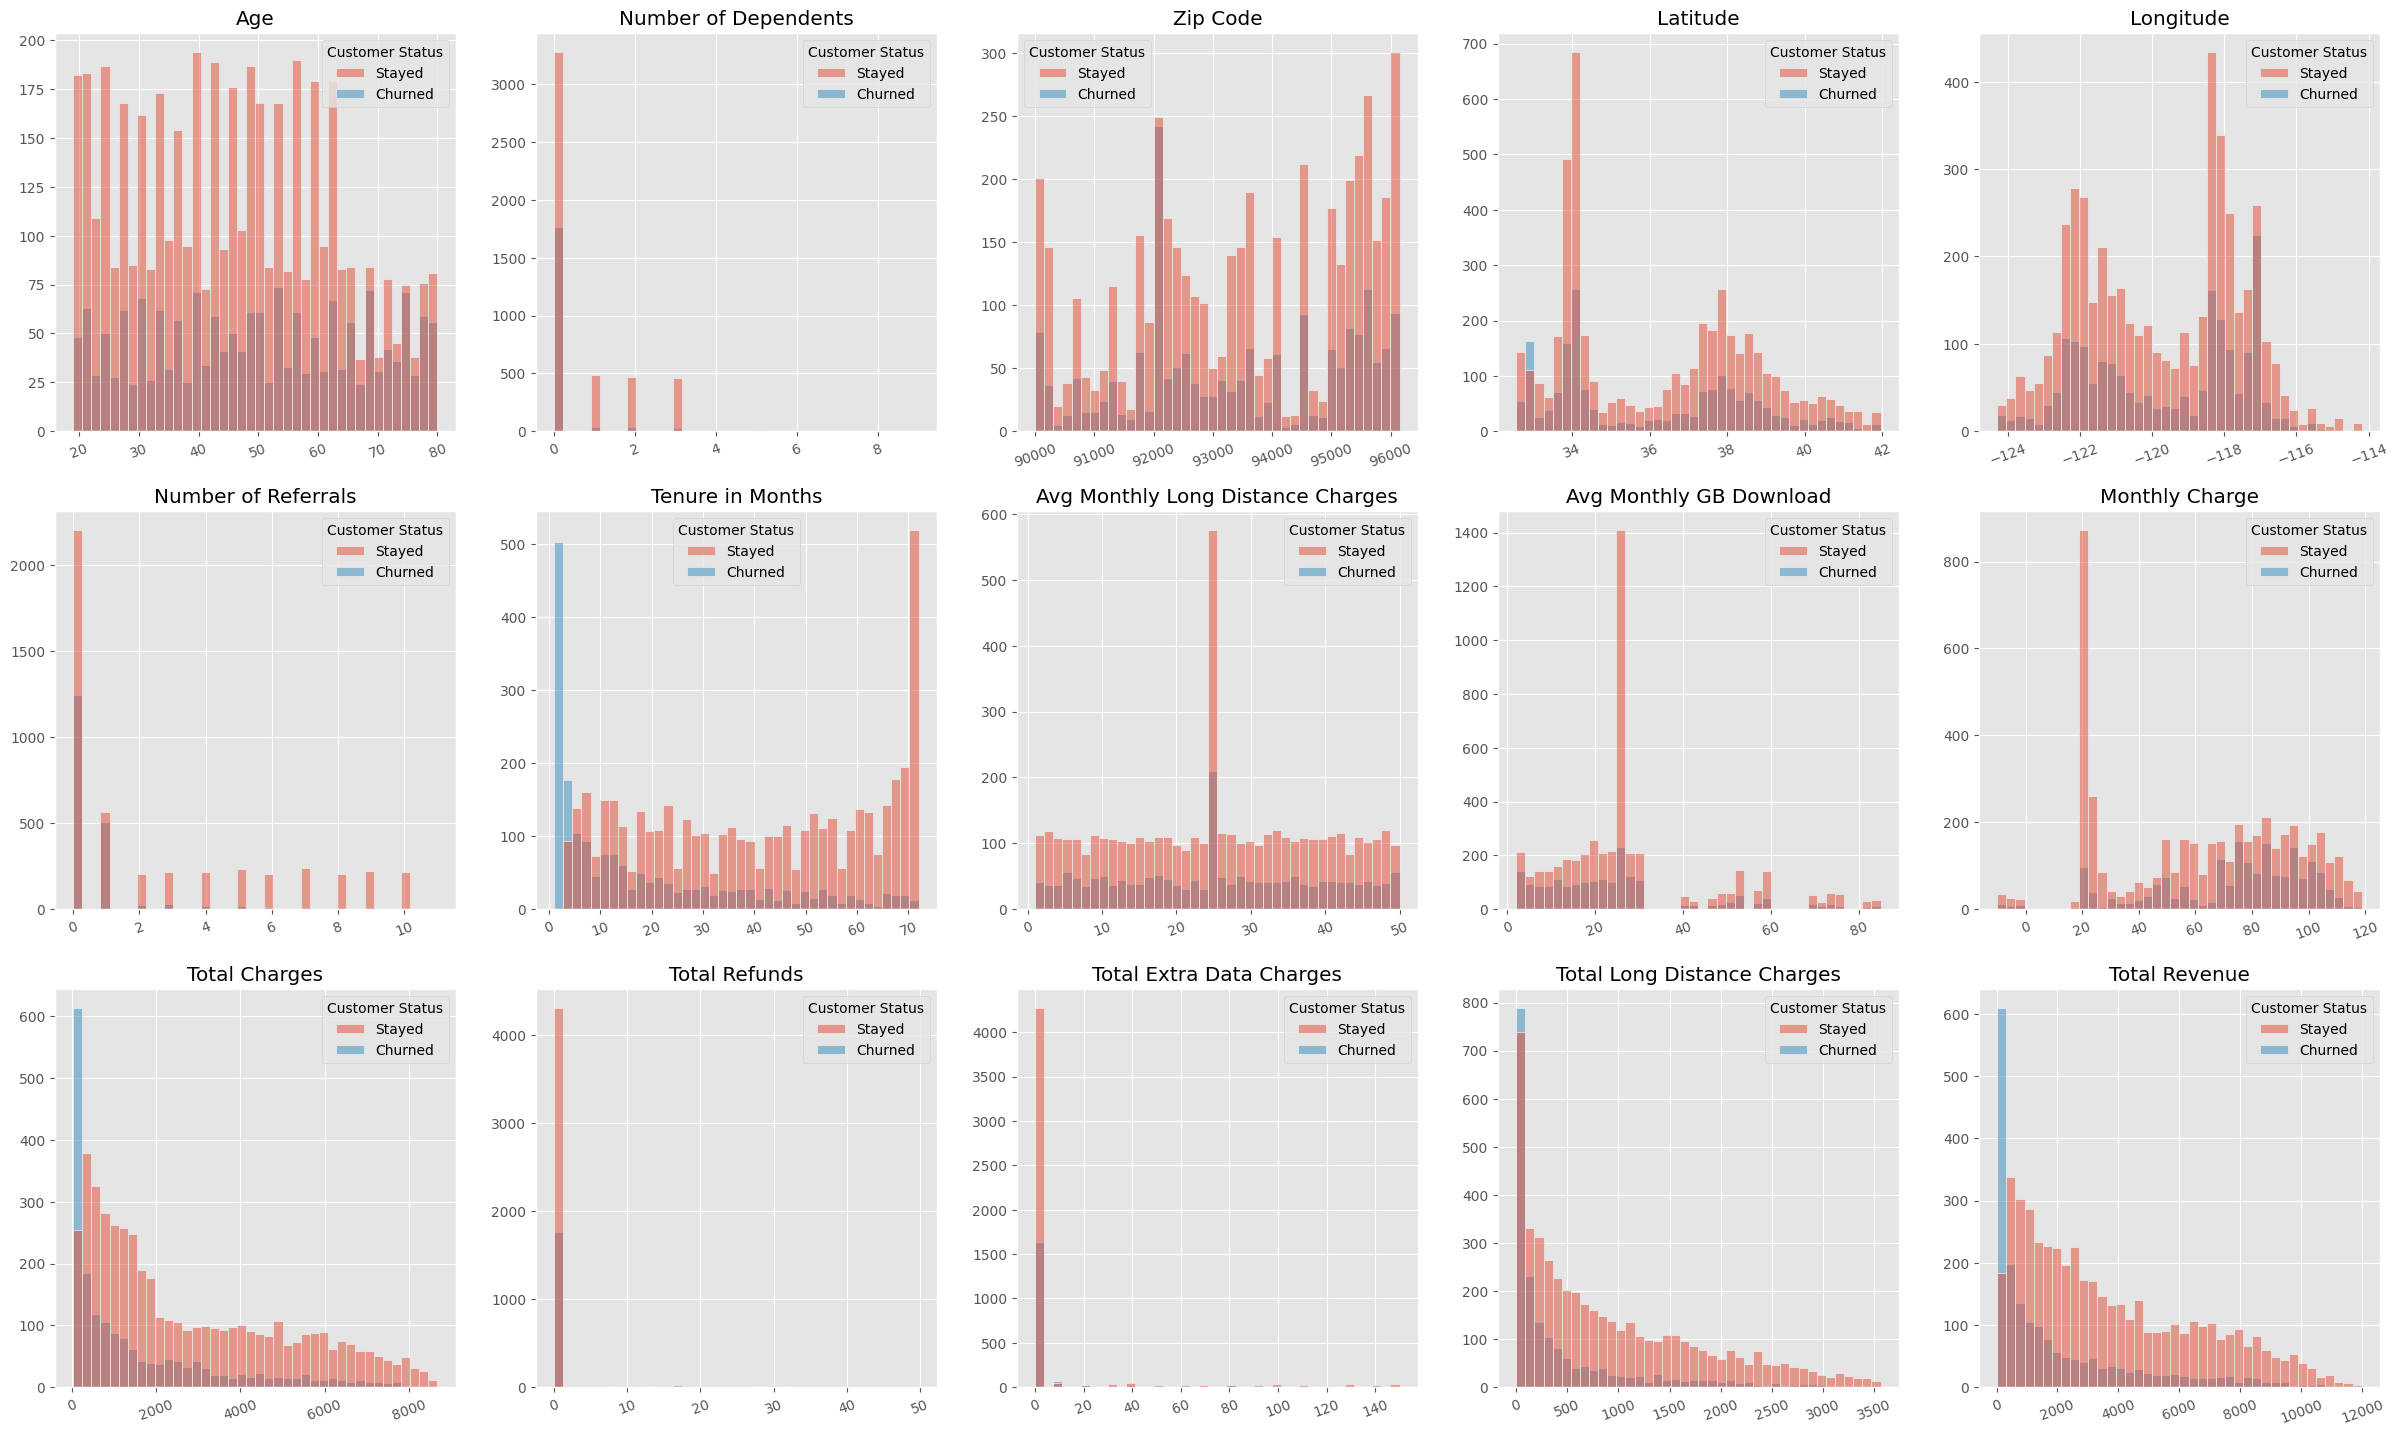

In [90]:
# Select numerical columns from the churned dataset
numeric_columns = churned.select_dtypes(include=['int64', 'float64']).columns
churned_numeric = churned[numeric_columns]

# Set up the figure size
plt.figure(figsize=(30, 30))

# Plot histograms for each numerical column
for index, column in enumerate(churned_numeric.columns, 1):
    plt.subplot(5, 5, index)
    sns.histplot(data=churned, x=column, hue='Customer Status', bins=40)
    plt.xlabel('')
    plt.ylabel('')
    plt.title(column, loc='center')
    plt.xticks(rotation=20, fontsize=10)


**Visualisation Insights:**

* Tenure in Months: The graph shows that the churn rate is particularly high during the first 5 to 10 months of service. This suggests that customers are most likely to leave soon after subscribing. It underscores the need to focus on strategies that engage and retain new customers during the early stages of their subscription.

* Total Charges and Revenue: The graph also reveals that churned customers, despite having shorter subscription periods, tend to have lower total charges compared to those who stayed. This suggests that churned customers may not have fully utilized or paid for the services offered.

* We can see that 'Total Refunds' and 'Total Extra Data Charges' are mainly filled with 0 values providing next to no information on customer status, and for this reason we will remove these columns before implementing our  predictive models.








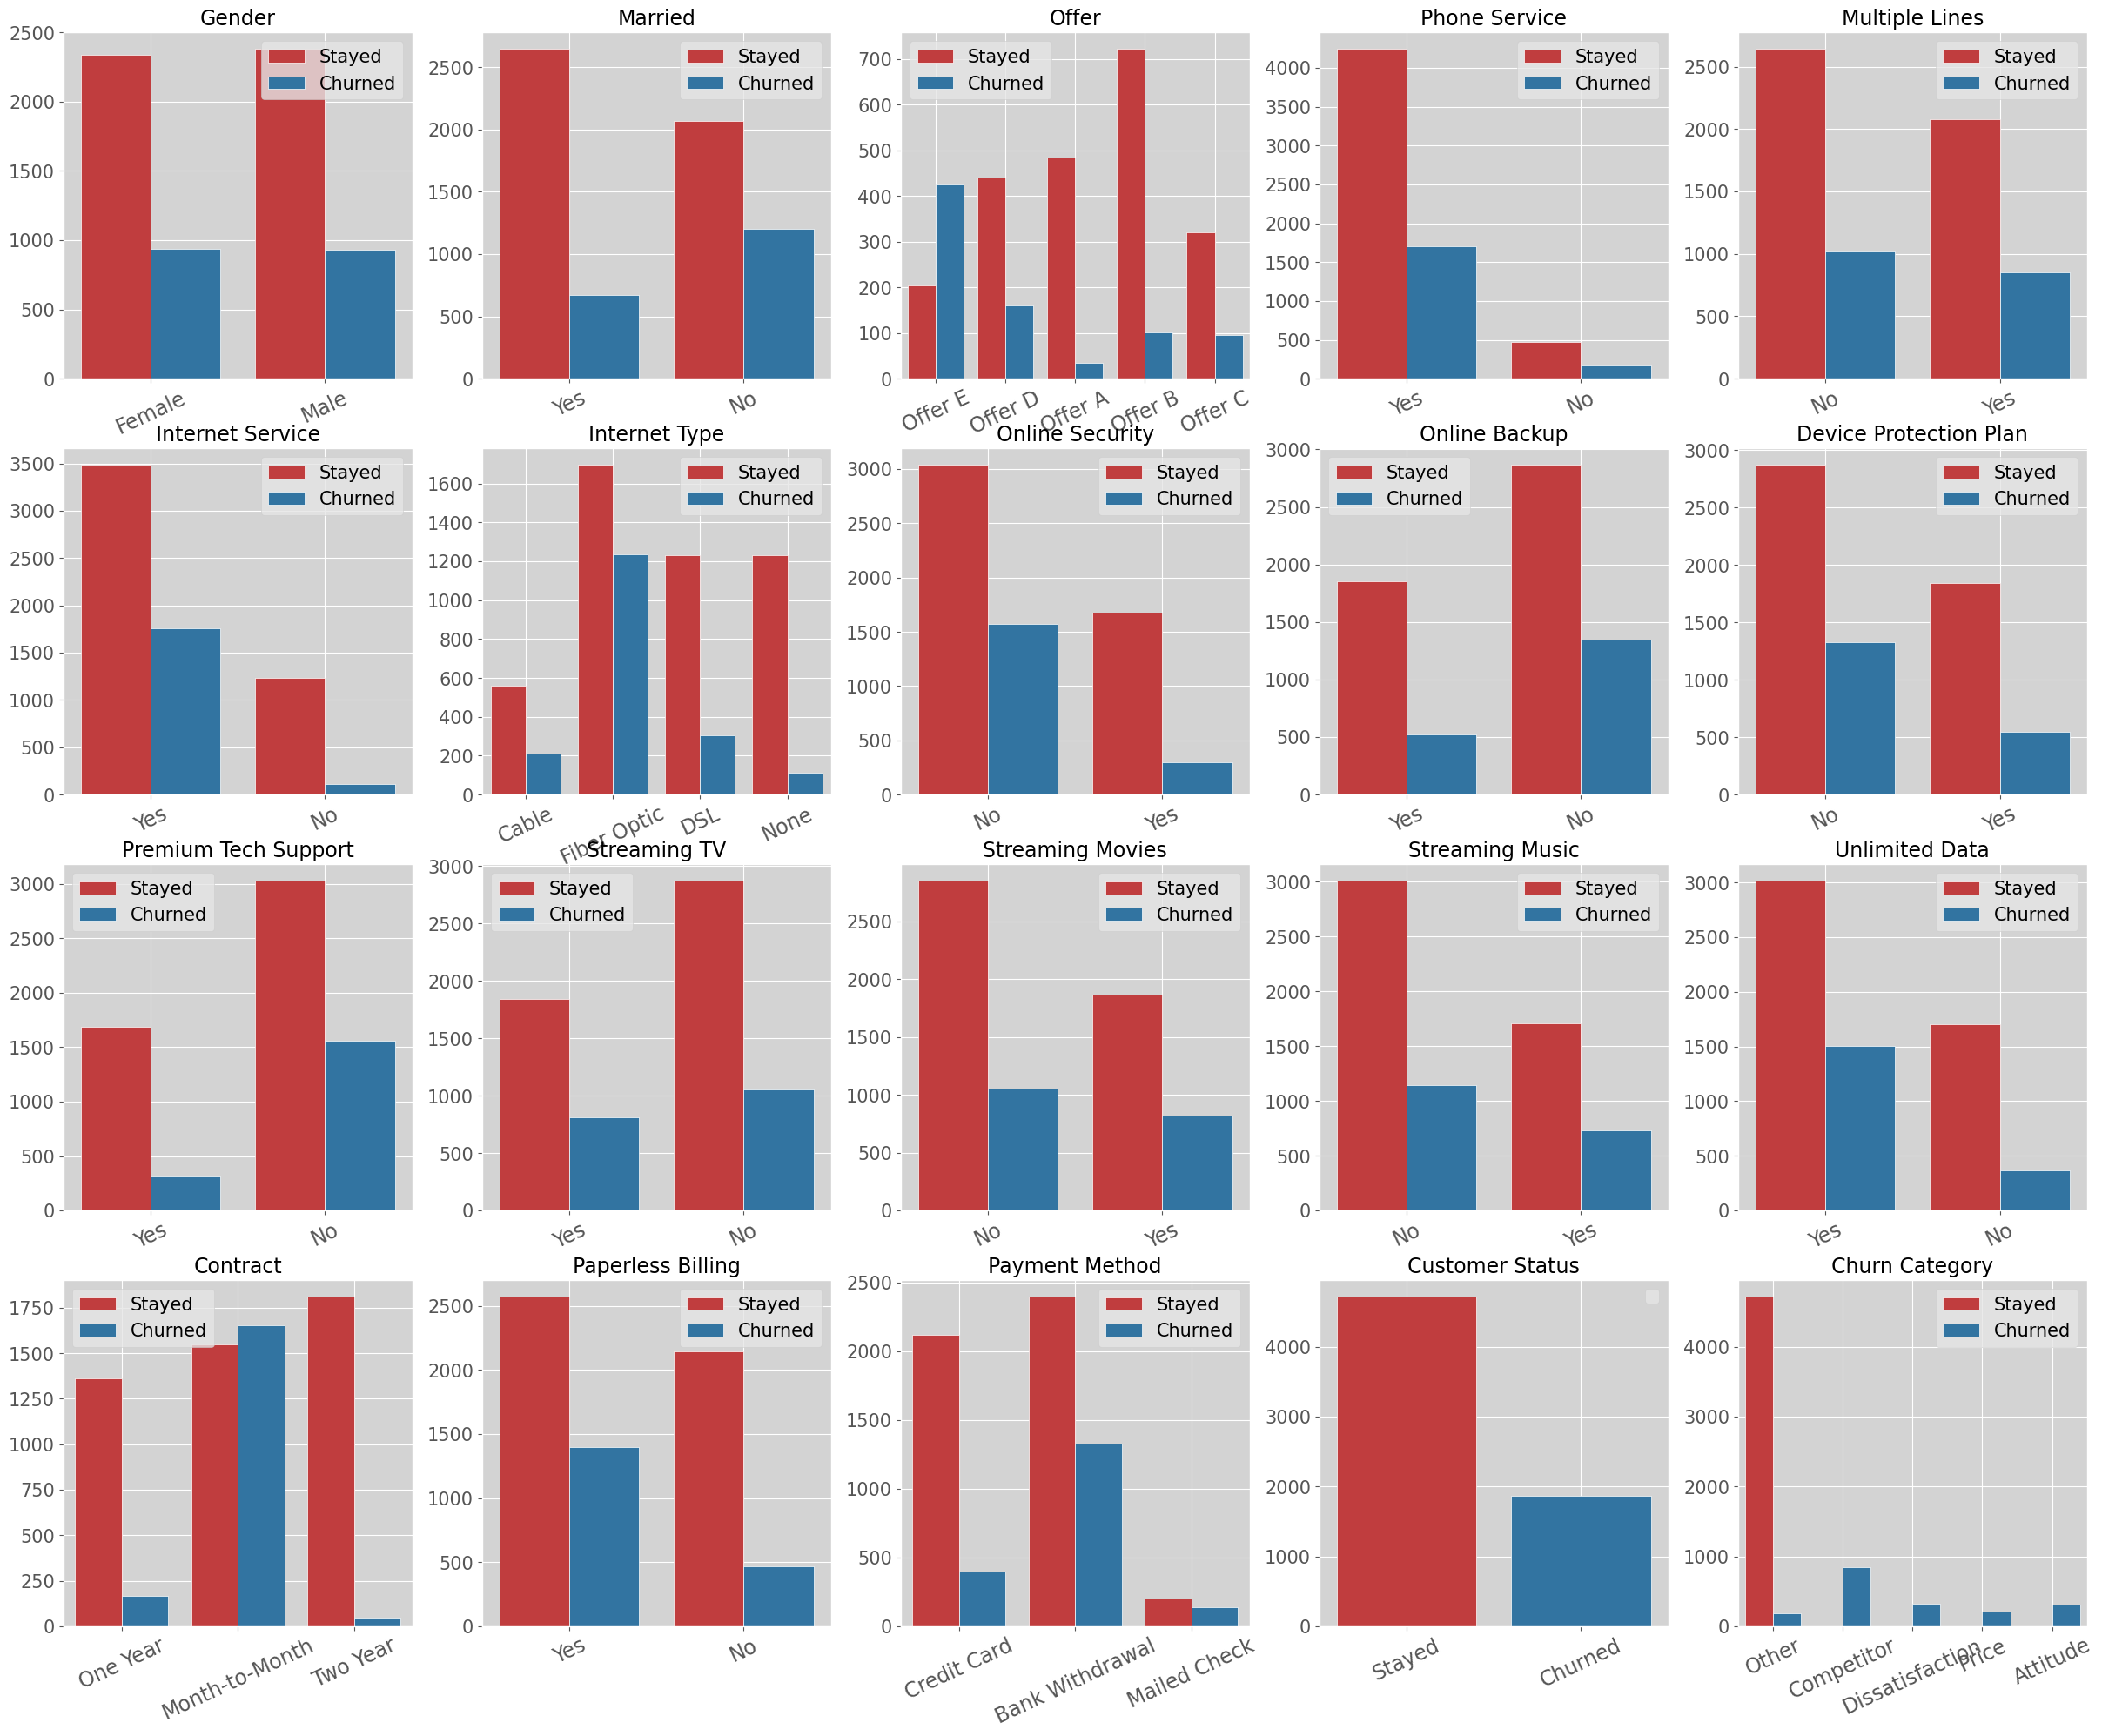

In [91]:
categorical = [column for column in churned.columns if churned[column].nunique() < 10 and churned[column].dtype == "object"]
churned_cat = churned[categorical]

fig = plt.figure(figsize=(30, 30))

# Define the custom palette with bolder red and blue
palette = {"Stayed": "#D62728", "Churned": "#1F77B4"}  # Bolder red and blue colors

i = 1
for c in churned_cat.columns:
    plt.subplot(5, 5, i)
    ax = sns.countplot(data=churned_cat, x=c, hue='Customer Status', palette=palette)

    # Set the plot aesthetics
    ax.set_facecolor('lightgrey')  # Light grey background
    ax.grid(True, color='white')   # White grid lines
    for patch in ax.patches:
        patch.set_edgecolor('white')  # Thin white outline for the bars

    ax.set(xlabel=None, ylabel=None)
    plt.title(str(c), loc='center', fontsize=17)  # Increase title font size
    plt.xticks(rotation=25, fontsize=17)  # Increase x-tick font size
    plt.yticks(fontsize=15)  # Increase y-tick font size
    ax.legend(fontsize=15)  # Increase legend font size
    i += 1

plt.show()



**Visualisation Insights**

**Offer:**

Offers have a significant churn rate, especially offer E. The marketing team should work on strategies to boost offer acceptance to increase customer engagement and conversions, aligning with customer expectations or needs.

**Internet Service:**

There is a noticeable higher churn rate among customers subscribed to internet services. Factors such as slow internet speeds could be contributing to customer dissatisfaction and their decision to leave.
By addressing these internet service issues and improving the overall user experience, the company could reduce churn in this segment.

**Internet Type:**

Fiber Optic is the most popular choice for internet connection, providing faster speeds than cable and DSL. However, despite its popularity, customers with Fiber Optic connections are more likely to cancel their service. This indicates a need to address specific concerns among Fiber Optic users.

**Contract:**

Longer contract periods, such as one or two years, seem to discourage customers from cancelling their service. Conversely, customers on monthly payment plans are more prone to churn, possibly due to the flexibility and lack of long-term commitment in these plans.

**Additional Internet Services:**

Customers who subscribe to additional internet services, like online security, backup, and device protection, tend to stay with the company longer. Promoting these extra services can help retain customers by enhancing their overall experience and providing more value.

In [92]:
df_churned = churned.loc[churned['Customer Status'] == 'Churned']
df_stayed  = churned.loc[churned['Customer Status'] == 'Stayed']

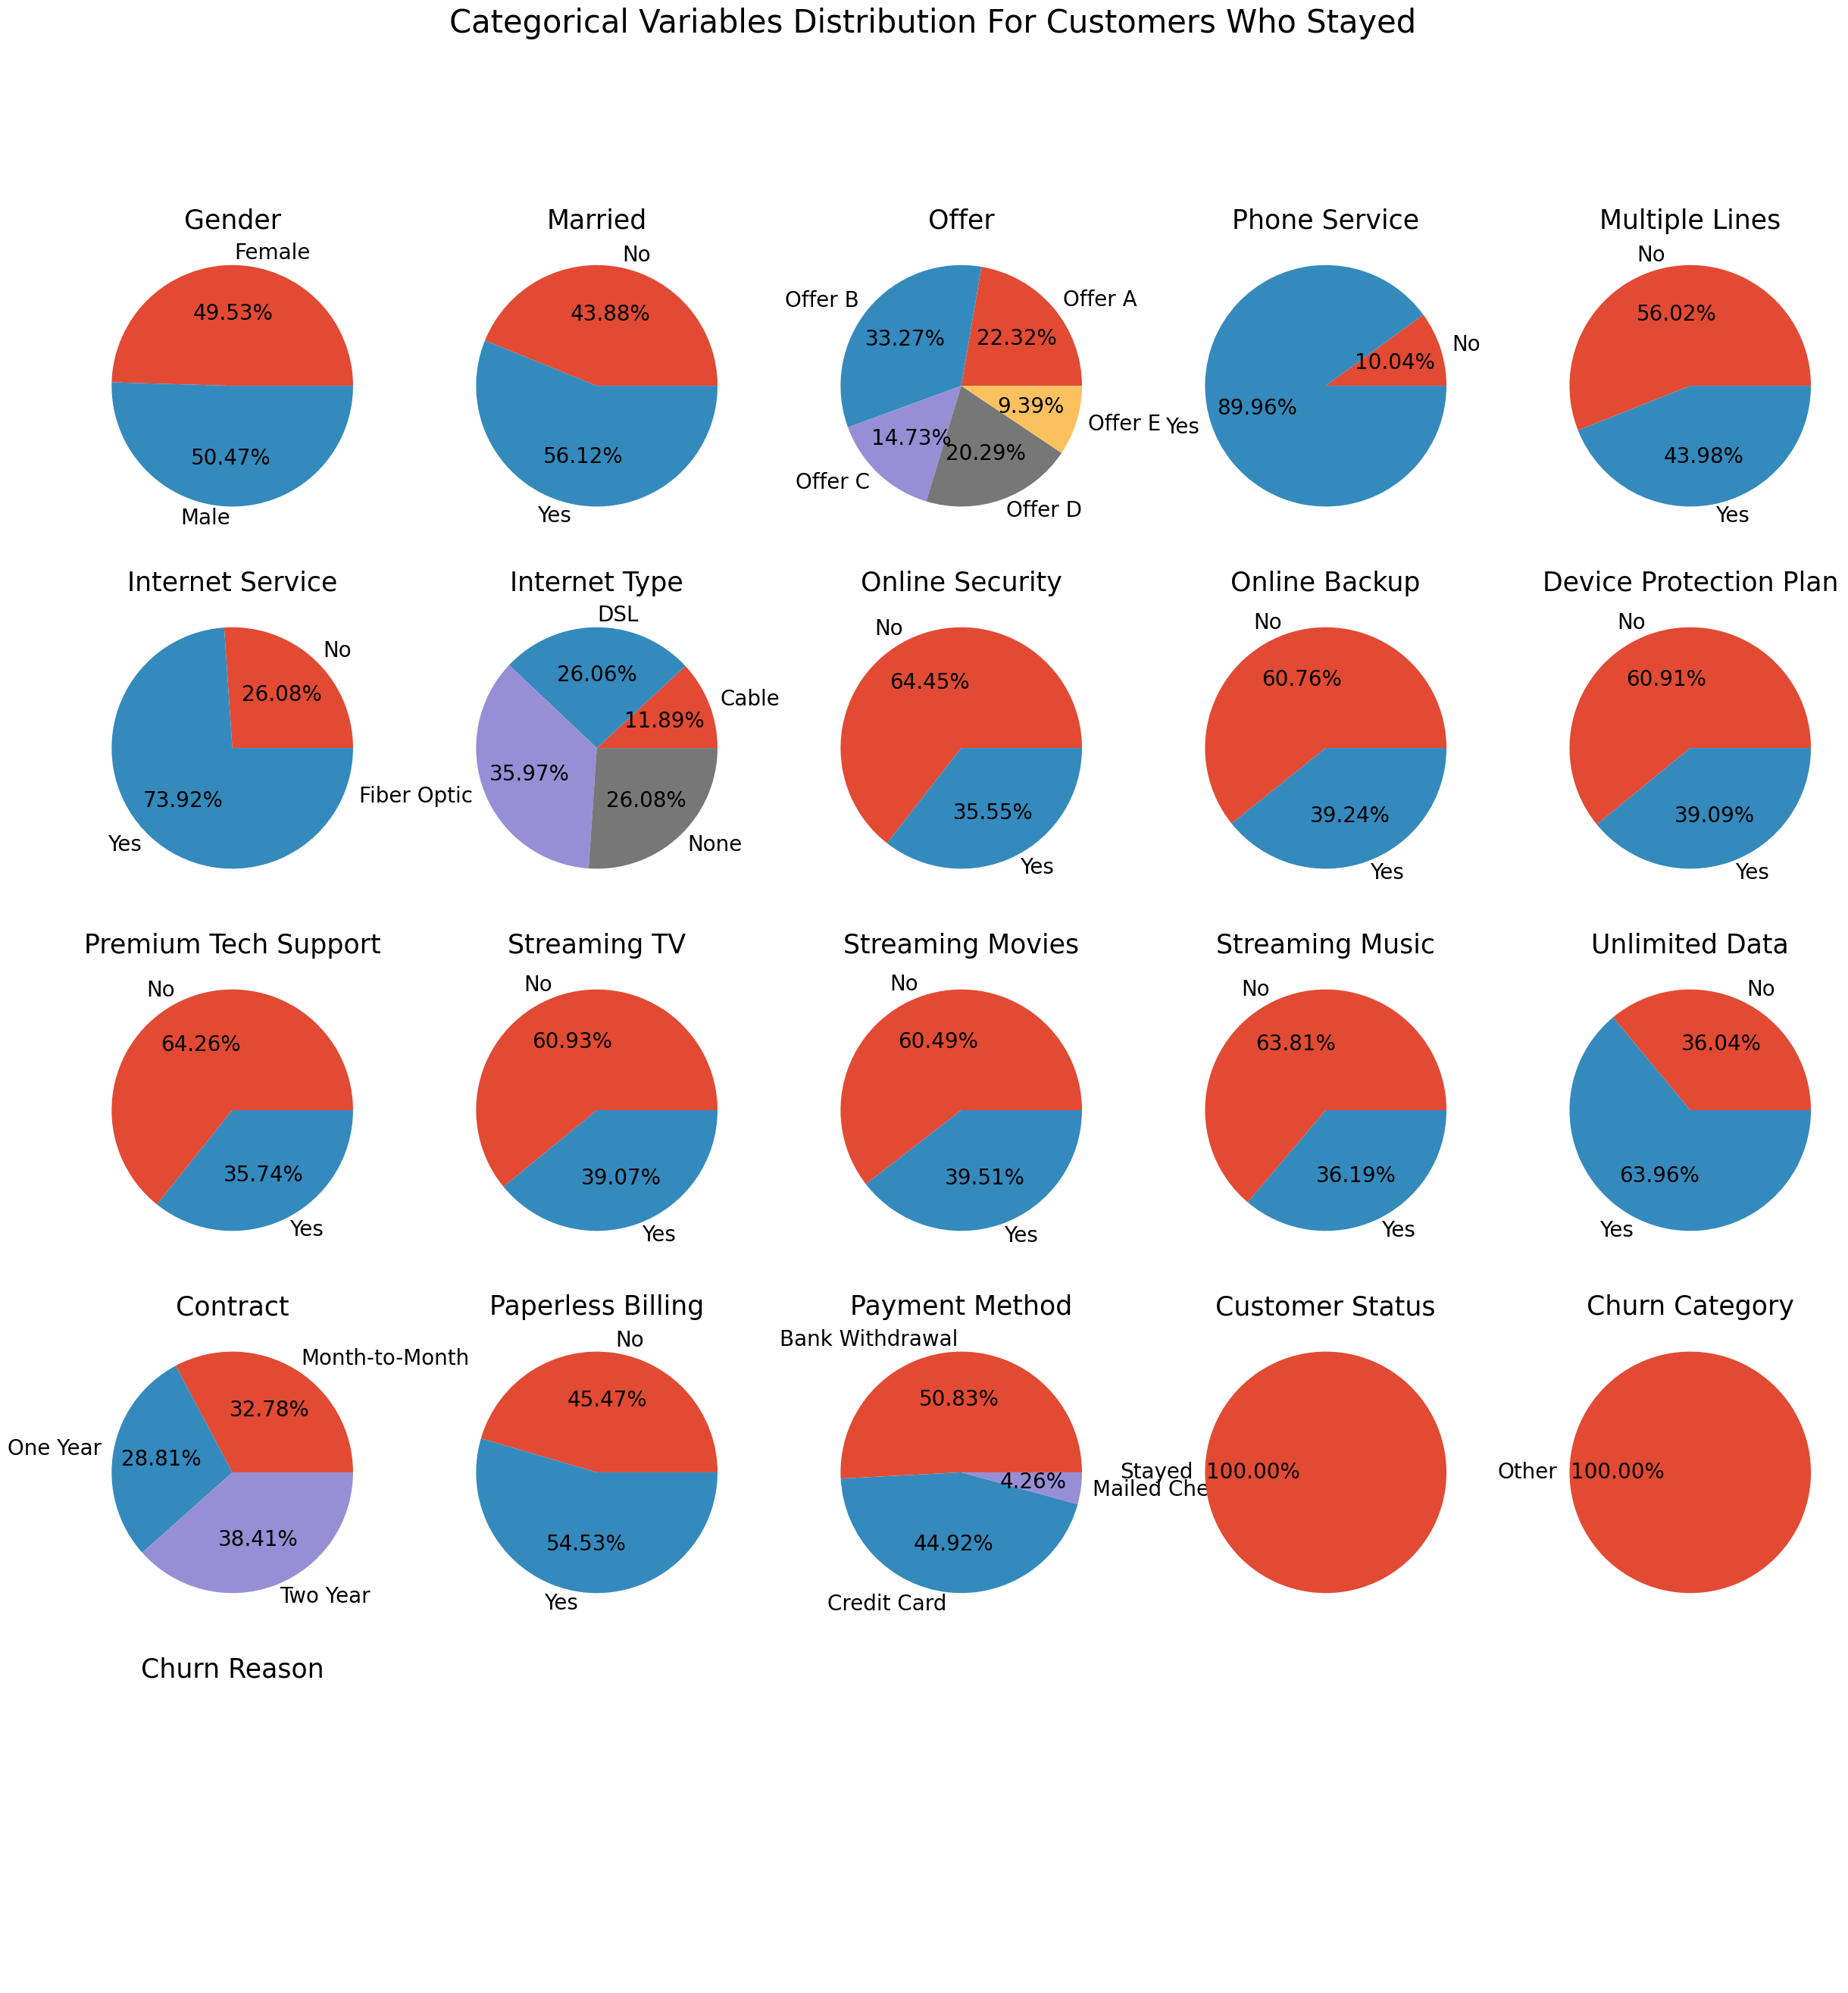

In [93]:
# Step 1: Identify categorical columns with fewer than 10 unique values
categorical_columns = [col for col in df_stayed.columns if df_stayed[col].nunique() < 10 and df_stayed[col].dtype == "object"]

# Step 2: Create a DataFrame with only the selected categorical columns
df_categorical = df_stayed[categorical_columns]

# Step 3: Set up a large figure to accommodate multiple pie charts
fig = plt.figure(figsize=(30, 30))

# Step 4: Loop through each categorical column and create a pie chart
for index, column in enumerate(df_categorical.columns, start=1):
    plt.subplot(5, 5, index)  # Positioning the subplot
    # Group data by the column and create a pie chart
    pie_chart = df_stayed.groupby([column]).size().plot(kind='pie', autopct='%.2f%%', textprops={'fontsize': 20})
    plt.title(str(column), loc='center', fontsize=25)  # Set title of the pie chart

# Step 5: Add a main title for the entire figure
fig.suptitle("Categorical Variables Distribution For Customers Who Stayed", fontsize=30)

# Step 6: Display the plots
plt.show()


**Visualisation Insights**

* 56.12% of our high-value customers are married.
* None of these customers have taken up Offer E.
* Over half of them have added extra internet services and streaming subscriptions to their plans.
* A significant 67.22% of these customers are on long-term contracts, with 38.41% choosing the two-year option and 28.81% opting for the one-year contract.

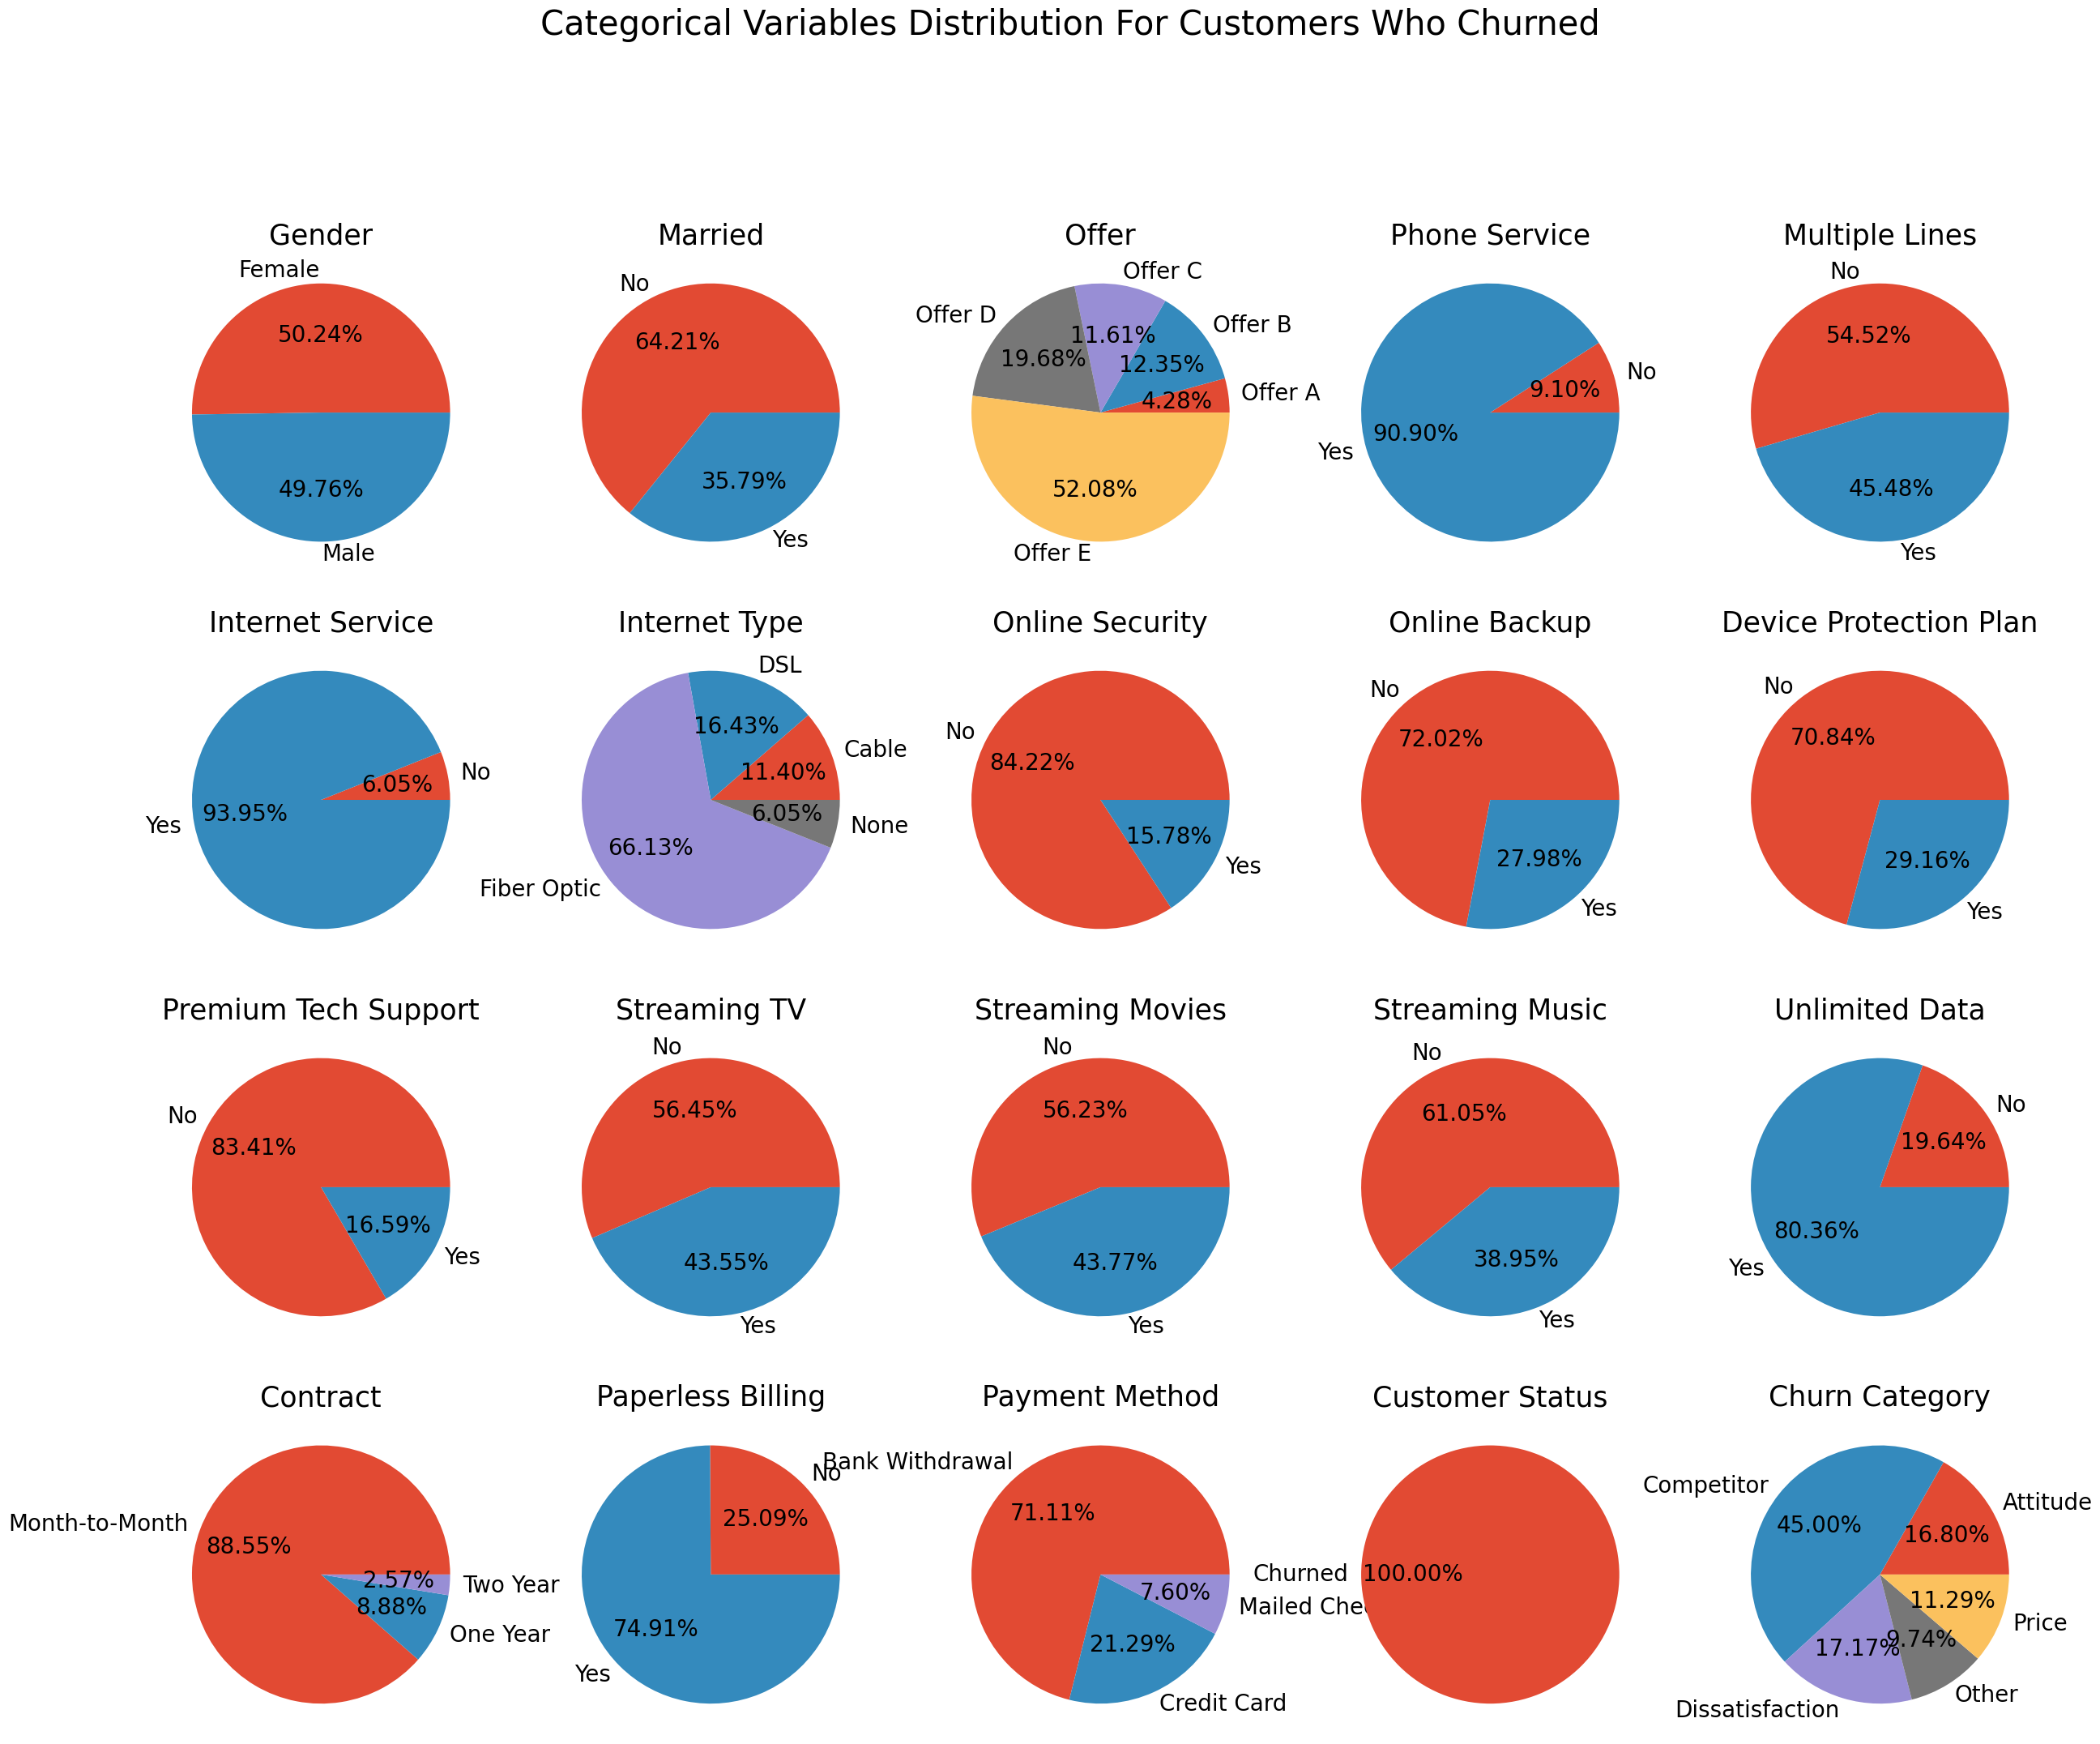

In [94]:
# Identify categorical columns with less than 10 unique values in the churned customers' dataset
categorical_columns = [
    column for column in df_churned.columns
    if df_churned[column].nunique() < 10 and df_churned[column].dtype == "object"
]

# Extract only the identified categorical columns from the churned customers' data
df_categorical = df_churned[categorical_columns]

# Create a large figure to accommodate multiple subplots
plt.figure(figsize=(30, 30))

# Loop through each categorical column to create a pie chart
for index, column in enumerate(df_categorical.columns, 1):
    plt.subplot(5, 5, index)  # Position each plot in a 5x5 grid
    df_churned.groupby(column).size().plot(kind='pie', autopct='%.2f%%', textprops={'fontsize': 20})
    plt.title(str(column), loc='center', fontsize=25)  # Set title of the pie chart

# Add a main title to the figure
plt.suptitle("Categorical Variables Distribution For Customers Who Churned", fontsize=30)

# Display the plots
plt.show()


**Visualisation Insights**

* Just 35.79% of customers who churned were married.

* Offer E seems to be the favorite among those who left.

* More than half of the customers who churned did not opt for extra internet services or streaming options.

* A significant 88.55% of churned customers preferred paying their bills on a month-to-month basis.

In [95]:
# Concatenate the dataframes vertically (row-wise) using pd.concat()
data = pd.concat([df_stayed, df_churned], ignore_index=True)

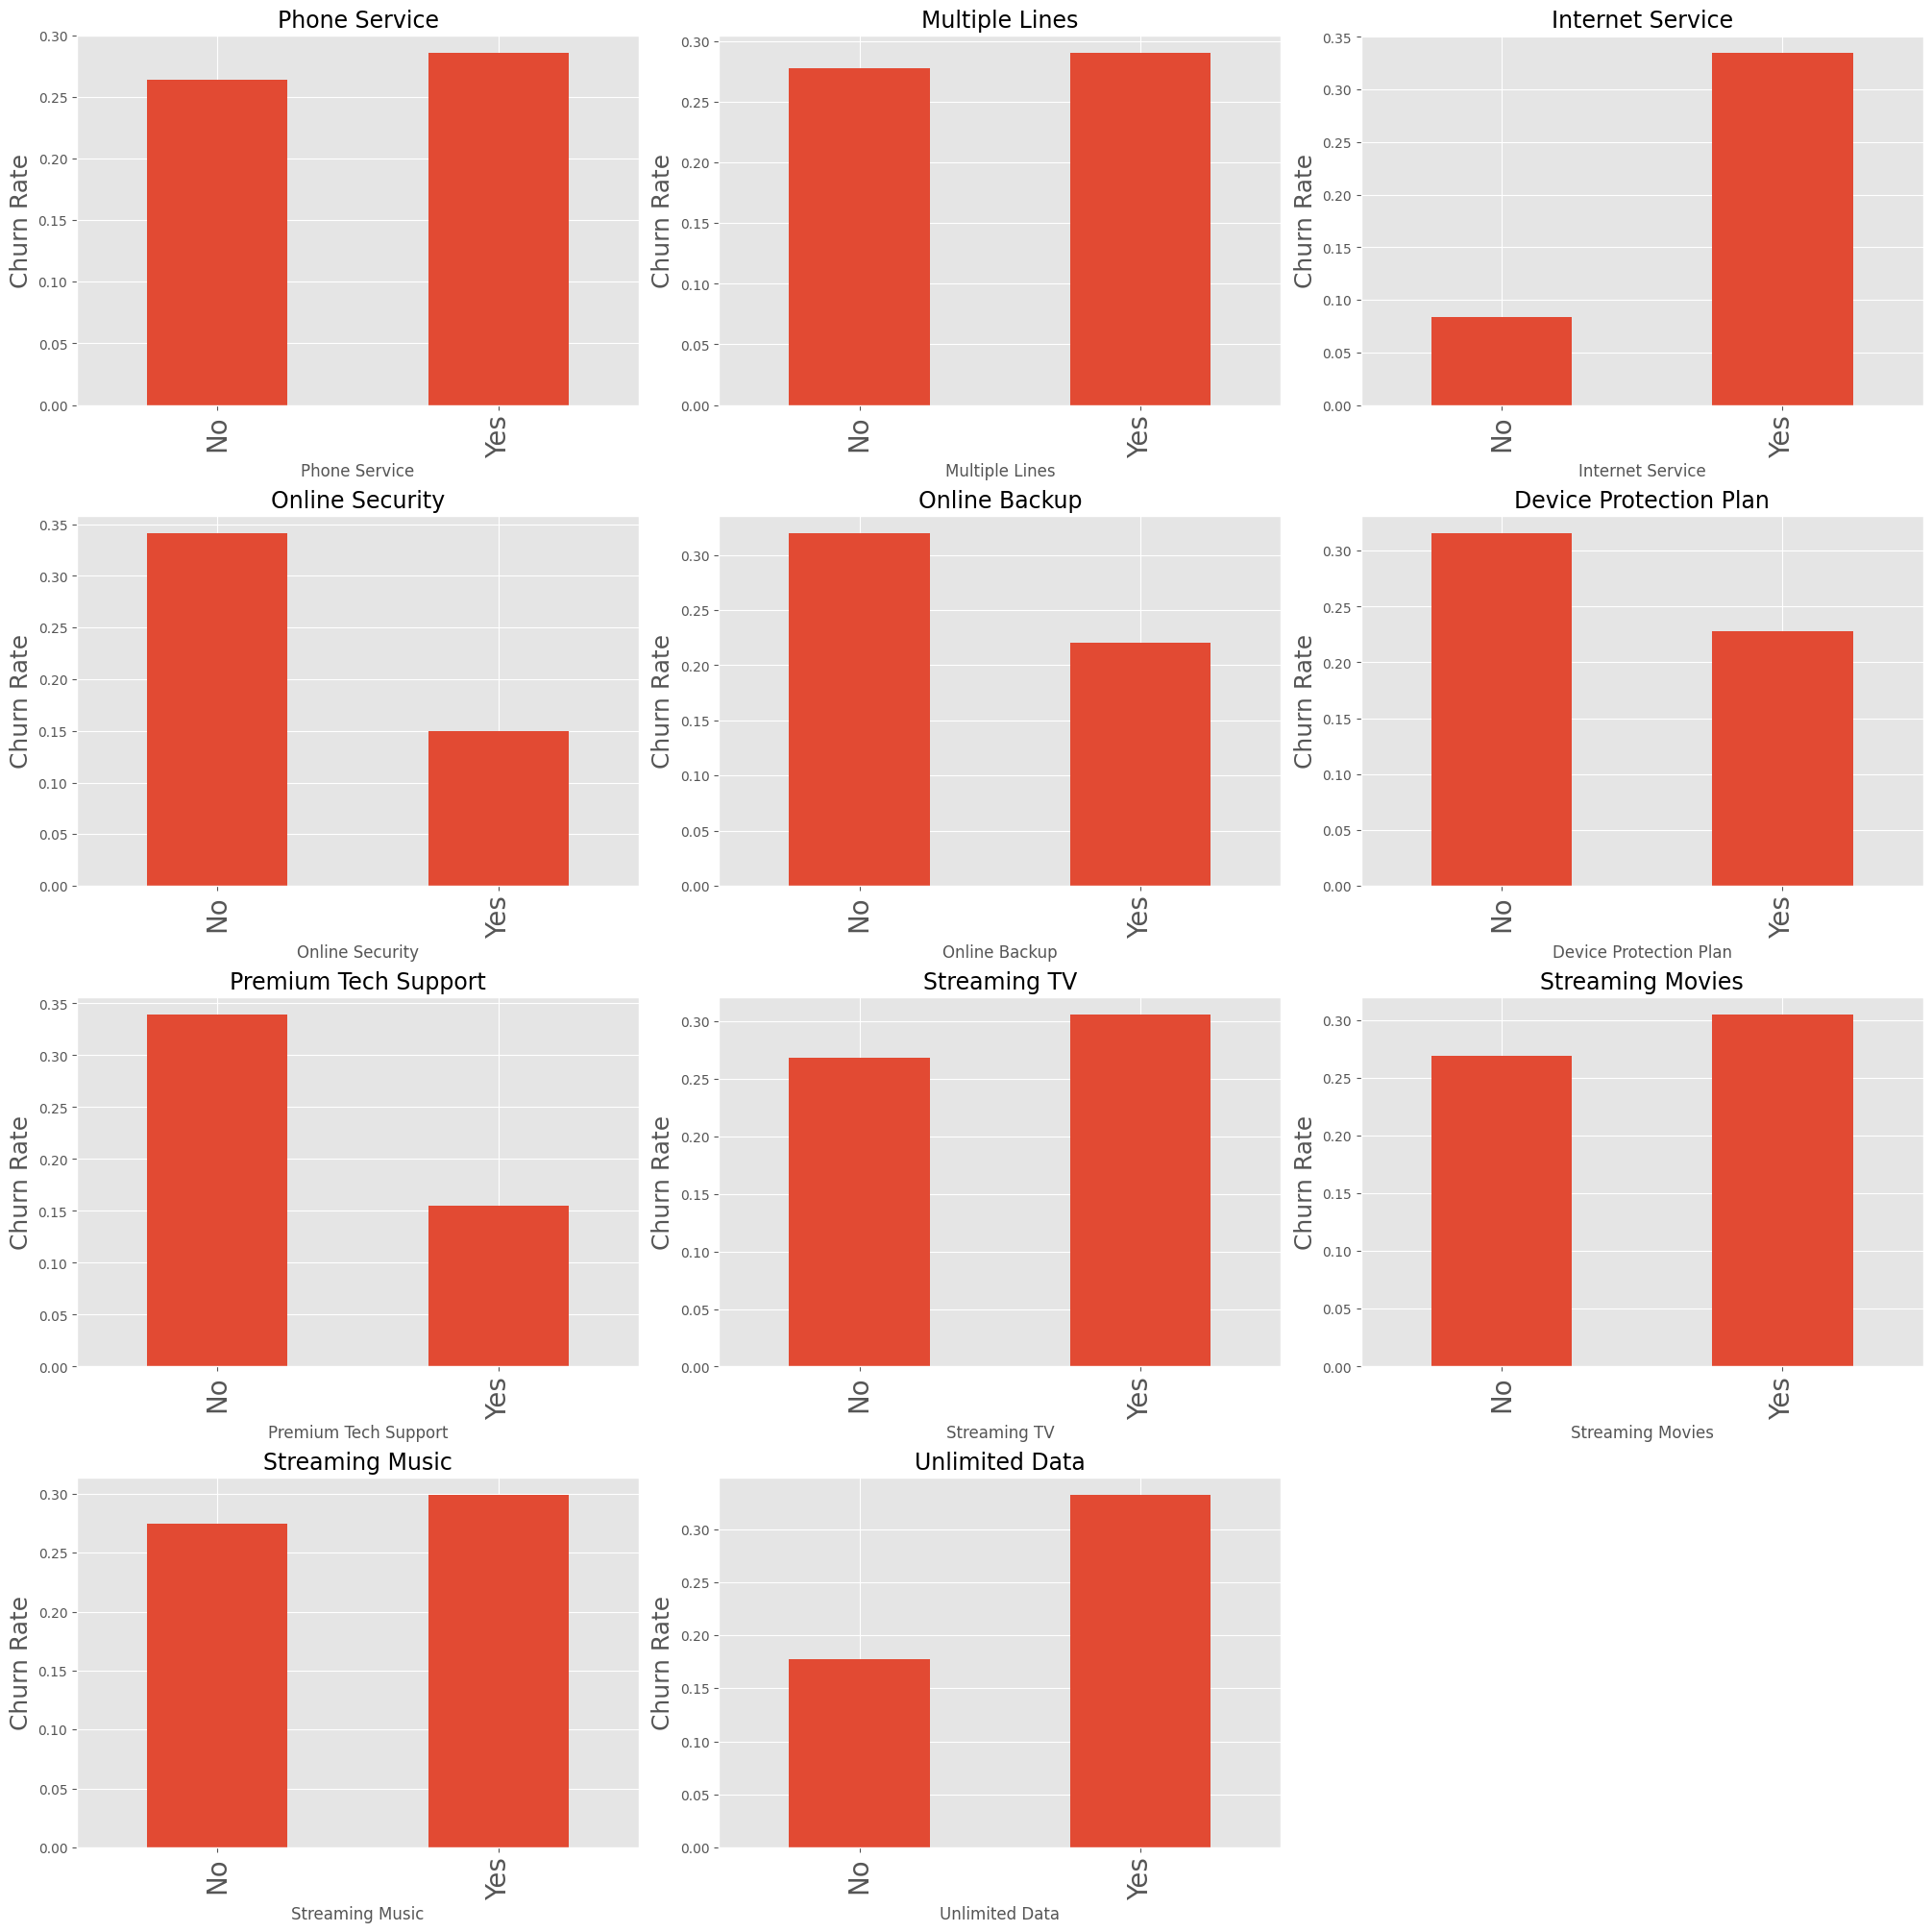

In [96]:
# Create a copy of the original data
customer_data = data.copy()

# Create a new column 'IsChurned' where 'Customer Status' equals 'Churned'
customer_data['IsChurned'] = (customer_data['Customer Status'] == 'Churned').astype(int)

# List of services to analyze
services_list = [
    'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security',
    'Online Backup', 'Device Protection Plan', 'Premium Tech Support',
    'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data'
]

# Determine the number of rows and columns for the subplots
total_services = len(services_list)  # total number of services
columns_per_row = 3  # number of columns in the subplot grid
rows_needed = total_services // columns_per_row + (total_services % columns_per_row > 0)  # calculate required rows

# Create subplots with the calculated number of rows and columns
fig, axes = plt.subplots(nrows=rows_needed, ncols=columns_per_row, figsize=(20, rows_needed * 5), constrained_layout=True)
axes = axes.ravel()  # Flatten the array of axes for easy iteration

# Generate a bar plot for each service showing the mean churn rate
for index, service in enumerate(services_list):
    customer_data.groupby(service)['IsChurned'].mean().plot(kind='bar', ax=axes[index])  # Calculate and plot mean churn rate
    axes[index].set_ylabel('Churn Rate', fontsize=18)  # Set ylabel with increased font size
    axes[index].set_title(service, fontsize=17)  # Set title with increased font size
    axes[index].tick_params(axis='x', labelsize=20)  # Increase x-tick label size for 'Yes' and 'No'

# Remove any unused subplots if there are fewer services than subplot spaces
for extra_plot in range(index + 1, rows_needed * columns_per_row):
    fig.delaxes(axes[extra_plot])

# Display the plots
plt.show()


**Visualisation Insights**
* For services like Phone Service, Multiple Lines, Streaming TV, Streaming Movies, and Streaming Music, there isn't much of a difference in churn rates between those who have these services and those who don't.

* Customers who subscribe to services like Online Security, Online Backup, Device Protection Plan, and Premium Tech Support tend to have lower churn rates.

* In contrast, having Internet Service and Unlimited Data is linked to higher churn rates.                



### **Hypothesis 1**

* Customers with longer subscription durations are less likely to churn.

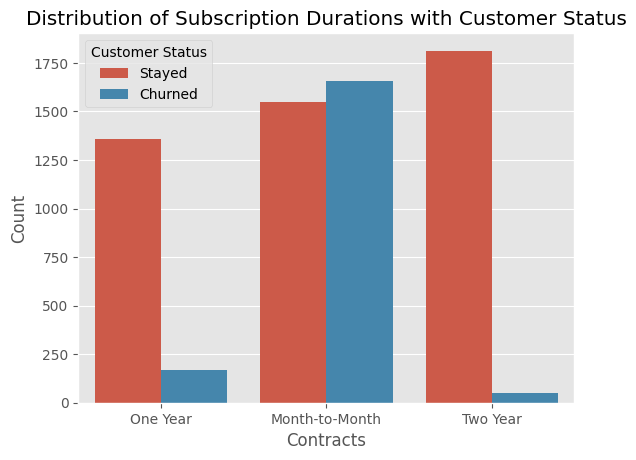

In [97]:
sns.countplot(data=data, x='Contract', hue='Customer Status')
plt.xlabel('Contracts')
plt.ylabel('Count')
plt.title('Distribution of Subscription Durations with Customer Status')
plt.show()

* We can visually see that the majority of the churned customers purchased the monthly subscriptions.


### **Hypothesis 1 Test**

In [98]:
# Calculate the average tenure for each combination of customer status and contract type
avg_tenure_by_group = data.groupby(['Customer Status', 'Contract'])['Tenure in Months'].mean()

# Identify unique contract types to perform t-tests
distinct_contracts = data['Contract'].unique()

# Loop through each contract type to conduct t-tests
for contract_type in distinct_contracts:
    # Select tenure data for customers who stayed and those who churned under the current contract type
    tenure_stayed = data[(data['Customer Status'] == 'Stayed') & (data['Contract'] == contract_type)]['Tenure in Months']
    tenure_churned = data[(data['Customer Status'] == 'Churned') & (data['Contract'] == contract_type)]['Tenure in Months']

    # Perform an independent t-test between the stayed and churned groups
    t_statistic, p_value = ttest_ind(tenure_stayed, tenure_churned, equal_var=False, nan_policy='omit')

    # Display the results
    print(f"\nT-test results for {contract_type} contract:")
    print(f"t-statistic: {t_statistic}")
    print(f"p-value: {p_value}")



T-test results for One Year contract:
t-statistic: -2.2912380929114327
p-value: 0.022943965825845975

T-test results for Month-to-Month contract:
t-statistic: 18.812287325134832
p-value: 7.020827607845855e-75

T-test results for Two Year contract:
t-statistic: -4.181747778825663
p-value: 0.00010410732171989667


**Results Insights**

* The analysis supports Hypothesis 1 for customers on month-to-month contracts, showing that these customers have a lower average tenure in months and are more prone to churn.

* Specifically, churned customers have an average tenure of about 14 months, while active customers have an average tenure of around 25 months.
* This finding aligns with the hypothesis that customers with longer subscription durations, such as those with one-year and two-year contracts, are less likely to churn.
* There are significant differences in average tenures between those who stayed and those who churned across these contract types.
* The positive t-statistic indicates that active customers tend to have longer tenures than those who churned.
* Additionally, the p-value is nearly zero, indicating that the difference is statistically significant. This further reinforces the idea that customers with longer tenures, particularly those on month-to-month contracts, are less likely to churn.

### **Hypothesis 2:**

* Customers with higher monthly billing amounts are more likely to churn

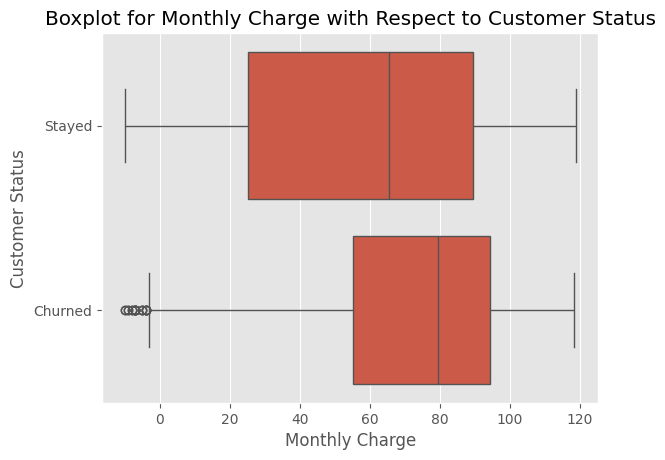

In [99]:
sns.boxplot(x='Monthly Charge', y='Customer Status', data=data)
plt.xlabel('Monthly Charge')
plt.ylabel('Customer Status')
plt.title('Boxplot for Monthly Charge with Respect to Customer Status')
plt.show()

### **Hypothesis 2 Test**

* Use regression analysis to examine the relationship between monthly billing amount and churn.

In [100]:
# Copy the data to a new DataFrame and map 'Customer Status' to binary values
data_copy = data.copy()
data_copy['Churn_Flag'] = data_copy['Customer Status'].map({'Stayed': 0, 'Churned': 1})

# Define the feature and target variables
feature = data_copy[['Monthly Charge']]  # Feature contains the monthly charge data
target = data_copy['Churn_Flag']  # Target contains the churn status

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.3, random_state=42)

# Instantiate and train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate and print the model's accuracy
accuracy = metrics.accuracy_score(y_test, predictions)
print("Model Accuracy:", accuracy)


Model Accuracy: 0.7258472432979262


* The logistic regression model used to evaluate Hypothesis 2, which states that "Customers with higher monthly billing amounts are more likely to churn," has an accuracy of roughly 72.4%.

* This accuracy represents the percentage of instances where the model correctly identified whether a customer churned based on their monthly billing amount.
* With an accuracy rate of 72.4%, the model was able to predict customer churn status correctly most of the time, suggesting a potential link between higher monthly charges and customer churn. This finding lends some credence to the hypothesis that customers with higher bills are more prone to leaving.

### **Using Statsmodel api for Hypothesis 2 Testing**

In [101]:
# Add a constant (intercept) term to the DataFrame
data_copy['constant'] = 1

# Specify the logistic regression model using the Logit function
# The dependent variable is the churn status, and the independent variables include the monthly charge and intercept
logistic_model = sm.Logit(data_copy['Churn_Flag'], data_copy[['Monthly Charge', 'constant']])

# Fit the logistic regression model to the data
model_results = logistic_model.fit()

# Display the summary of the model
print(model_results.summary())


Optimization terminated successfully.
         Current function value: 0.581757
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:             Churn_Flag   No. Observations:                 6589
Model:                          Logit   Df Residuals:                     6587
Method:                           MLE   Df Model:                            1
Date:                Fri, 23 Aug 2024   Pseudo R-squ.:                 0.02451
Time:                        01:56:44   Log-Likelihood:                -3833.2
converged:                       True   LL-Null:                       -3929.5
Covariance Type:            nonrobust   LLR p-value:                 8.646e-44
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Monthly Charge     0.0127      0.001     13.485      0.000       0.011       0.015
constant         

The model supports Hypothesis 2, confirming that customers with higher monthly bills are more likely to churn.

Let’s dive into the 'Monthly Charge' coefficient from the model summary.

* The coefficient for 'Monthly Charge' is 0.0127 with a p-value of 0.000.
* This positive coefficient indicates that as the 'Monthly Charge' increases, the log-odds of a customer churning also rise. In simpler terms, customers with higher monthly bills are indeed more likely to churn, which aligns with our hypothesis.

Furthermore, the p-value being less than 0.05 (specifically 0.000) shows that this effect is statistically significant, meaning the relationship between monthly billing and churn is unlikely to be due to chance. The intercept value of -1.7845 represents the baseline log-odds of churn when the monthly charge is zero.

## **Predictive Modelling**

**Please Note: The values for the accuracy and their visualisations of confusion matrix and ROC may very slightly change each time the code is run due to different sample distribution being selected**

* Logistic Regression
* Random Forest Model
* Gradient Boosting
* XGBoost

### **Data Preparation**

In [102]:
# Columns to be updated, convert categorical binary columns into numerical format (0 and 1).
binary_cols = [
    'Online Security', 'Multiple Lines',
    'Streaming TV', 'Premium Tech Support',
    'Streaming Movies', 'Streaming Music',
    'Paperless Billing', 'Unlimited Data',
    'Married', 'Phone Service', 'Internet Service',
    'Device Protection Plan', 'Online Backup',
    ]
# Iterate over each column, use replace method to replace no with 0 and yes 1
for column in binary_cols:
    # Replace 'No' with 0 and 'Yes' with 1
    data[column].replace({'No': 0, 'Yes': 1}, inplace=True)


In [103]:
# Replace Values in Categorical Columns

data.replace({'Contract':{'Month-to-Month': 0, 'One Year': 1, 'Two Year':2}},inplace=True)
data.replace({"Gender":{'Female':0,'Male':1}},inplace=True)
data.replace({'Offer':{'None':0,'Offer A': 1, 'Offer B':2, 'Offer C':3, 'Offer D':4, 'Offer E': 5}},inplace=True)
data.replace({'Payment Method':{'Credit Card': 0, 'Bank Withdrawal': 1, 'Mailed Check':2}},inplace=True)
data.replace({'Internet Type':{'None':0,'Fiber Optic': 1, 'DSL':2, 'Cable':3}},inplace=True)

In [104]:
print(data.columns)

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')


In [105]:
# Remove columns that are not needed for the analysis

# List of columns you want to drop
columns_to_drop = ['Customer ID', 'Total Refunds', 'City', 'Zip Code', 'Latitude', 'Longitude', 'Churn Category', 'Churn Reason', 'Total Extra Data Charges']

# Drop only the columns that exist in the DataFrame
data.drop([col for col in columns_to_drop if col in data.columns], axis='columns', inplace=True)


In [106]:
# label Encoding- Convert the target variable 'Customer Status' into a numerical format- used to transform 'Customer Status' into 0 and 1.

encoder = LabelEncoder()
data['Customer Status'] = encoder.fit_transform(data['Customer Status'])

In [107]:
for index, label in enumerate(encoder.classes_):
    print(f"{index} corresponds to: {label}")

0 corresponds to: Churned
1 corresponds to: Stayed


In [108]:
# Define columns that need to be scaled
columns_to_scale = ['Tenure in Months','Monthly Charge','Number of Referrals','Total Charges','Avg Monthly Long Distance Charges',
    'Avg Monthly GB Download','Age','Number of Dependents','Total Long Distance Charges','Total Revenue'
    ]

# Instantiate the scaler, Scale numeric features to a range between 0 and 1 where MinMaxScaler is used to normalize numeric columns specified in columns_to_scale.
scaler = MinMaxScaler()
# Apply the scaler to the columns specified in the dataframe
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

In [109]:
# check for NaNs in the data and handle missing values in the dataset.
# SimpleImputer is used to fill missing values with the mean of the respective columns


# Check if there are any missing values in the dataset
if data.isnull().values.any():
    # Initialize the SimpleImputer with the mean strategy
    mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

    # Apply the imputer to the data and convert it back to a DataFrame
    data = pd.DataFrame(mean_imputer.fit_transform(data), columns=data.columns)


In [110]:
# Split the data into features (X) and target (y) so the target variable 'Customer Status' is separated from the features.

X = data.drop('Customer Status',axis='columns')
y = data['Customer Status']

In [111]:
# Split the dataset into training, testing sets, where 20% is used for testing, 80% for training, k fold validation is used in the predictive modelling phase

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)


In [112]:
# Calculate total data points
total_data = len(X_train) + len(X_test)

# Calculate percentage split for train and test data
train_percent = len(X_train) / total_data * 100
test_percent = len(X_test) / total_data * 100


In [113]:
print(f"Training set - X: {X_train.shape}, y: {y_train.shape}, {train_percent:.1f}% of total data")
print(f"Testing set - X: {X_test.shape}, y: {y_test.shape}, {test_percent:.1f}% of total data")


Training set - X: (5271, 28), y: (5271,), 80.0% of total data
Testing set - X: (1318, 28), y: (1318,), 20.0% of total data


## **Resampling Data**

To address class imbalances in the training data, the SMOTE (Synthetic Minority Over-sampling Technique) method is applied. SMOTE generates synthetic examples for the underrepresented class, helping to equalize the class distribution in the training dataset.

In [114]:
# Instantiate the SMOTE resampler
smote = SMOTE()
# Resample the training data using SMOTE, creating a new balanced training dataset (X_train_resampled, y_train_resampled) by generating synthetic samples for the minority class.
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

Before resampling:
Customer Status
1.0    3772
0.0    1499
Name: count, dtype: int64
After resampling:
Customer Status
1.0    3772
0.0    3772
Name: count, dtype: int64


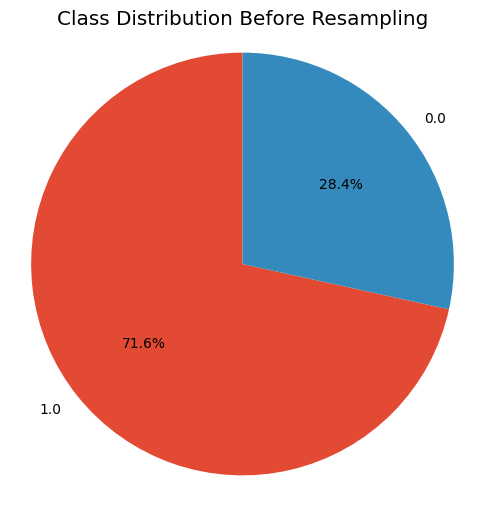

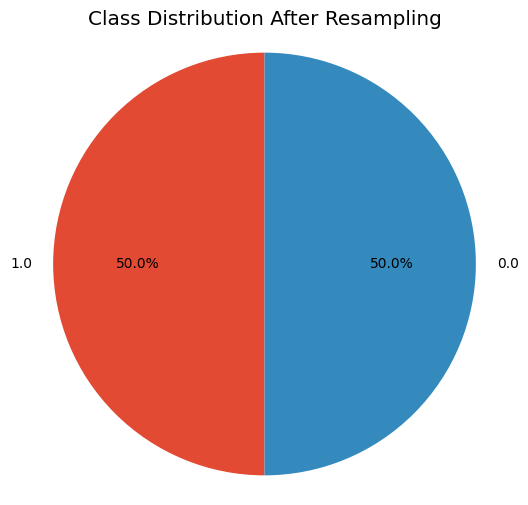

In [115]:
# Print the value counts of classes in the training set
print("Before resampling:")
print(y_train.value_counts()) # value counts- counts instances of customer status- 0 for stayed, 1 for churned

print("After resampling:")
print(y_train_resampled.value_counts()) # value counts- counts instances of customer status- 0 for stayed, 1 for churned

# Plot the pie chart of class distribution before resampling
plt.figure(figsize=(6, 6))
plt.title("Class Distribution Before Resampling")
plt.pie(y_train.value_counts(), labels=y_train.value_counts().index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()

# Plot the pie chart of class distribution after resampling
plt.figure(figsize=(6, 6))
plt.title("Class Distribution After Resampling")
plt.pie(y_train_resampled.value_counts(), labels=y_train_resampled.value_counts().index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()

After resampling, the class distribution is now balanced, with each class representing 50.0% of the training data. This adjustment ensures that the machine learning model will not favor the majority class, leading to improved performance on the minority class. Consequently, the model will make more accurate and equitable predictions, avoiding bias towards the previously dominant class and providing balanced outcomes for both classes.

In [116]:
X_train, y_train = X_train_resampled, y_train_resampled #renaming the variables to resampled data

###**K-fold cross-validation**

K-fold cross-validation will be used to help tune hyperparameters and validate the Machine Learning Models. It was chosen over base validation since it evaluates a model's performance by dividing the data into multiple subsets, enhancing generalization and reducing overfitting. The code implements 10-fold cross-validation for Logistic Regression, Random Forest, Gradient Boosting and XGBoost, averaging metrics like accuracy, precision, recall, and F1 scores across folds. This method internally manages model fitting by training on 9 folds and testing on the 10th, iterating 10 times.

## **Logistic Regression Model**

In [117]:
# Instantiate the logistic regression model with pipeline
logreg = make_pipeline(StandardScaler(), LogisticRegression(penalty='l2', C=10))

In [118]:
# Define the k-fold cross-validation with 10 folds
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Calculate accuracy, precision, recall, and f1 score using cross-validation
accuracy = cross_val_score(logreg, X_train, y_train, cv=kf, scoring='accuracy')
precision = cross_val_score(logreg, X_train, y_train, cv=kf, scoring='precision')
recall = cross_val_score(logreg, X_train, y_train, cv=kf, scoring='recall')
f1 = cross_val_score(logreg, X_train, y_train, cv=kf, scoring='f1')

# Print the average and standard deviation of the scores
print(f"Cross-Validated Accuracy: {accuracy.mean():.4f}")
print(f"Cross-Validated Precision: {precision.mean():.4f}")
print(f"Cross-Validated Recall: {recall.mean():.4f}")
print(f"Cross-Validated F1 Score: {f1.mean():.4f}")


Cross-Validated Accuracy: 0.8352
Cross-Validated Precision: 0.8649
Cross-Validated Recall: 0.7947
Cross-Validated F1 Score: 0.8281


The Logistic Regression model averages an accuracy of 84%, with a precision of 87%, indicating a high rate of correct churn predictions. The recall of 80% shows the model's strength in identifying actual churn cases. An F1 score of 83% demonstrates a good balance between precision and recall, ensuring reliable predictions.



### **Random Forest Model**

In [119]:
# Instantiate the random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=26, max_depth=14, random_state=42)

In [120]:
# Define the k-fold cross-validation with 10 folds
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Calculate accuracy, precision, recall, and f1 score using cross-validation
accuracy = cross_val_score(rf_classifier, X_train, y_train, cv=kf, scoring='accuracy')
precision = cross_val_score(rf_classifier, X_train, y_train, cv=kf, scoring='precision')
recall = cross_val_score(rf_classifier, X_train, y_train, cv=kf, scoring='recall')
f1 = cross_val_score(rf_classifier, X_train, y_train, cv=kf, scoring='f1')

# Print the average of the scores
print(f"Cross-Validated Accuracy: {accuracy.mean():.4f}")
print(f"Cross-Validated Precision: {precision.mean():.4f}")
print(f"Cross-Validated Recall: {recall.mean():.4f}")
print(f"Cross-Validated F1 Score: {f1.mean():.4f}")


Cross-Validated Accuracy: 0.9002
Cross-Validated Precision: 0.9080
Cross-Validated Recall: 0.8906
Cross-Validated F1 Score: 0.8991


The Random Forest model avergaes an accuracy of 89-90%, with a precision of 90%, indicating a high rate of correct churn predictions. The recall of 89 shows the model's strength in identifying actual churn cases. An F1 score of 90%.08% demonstrates a solid balance between precision and recall, ensuring reliable predictions.



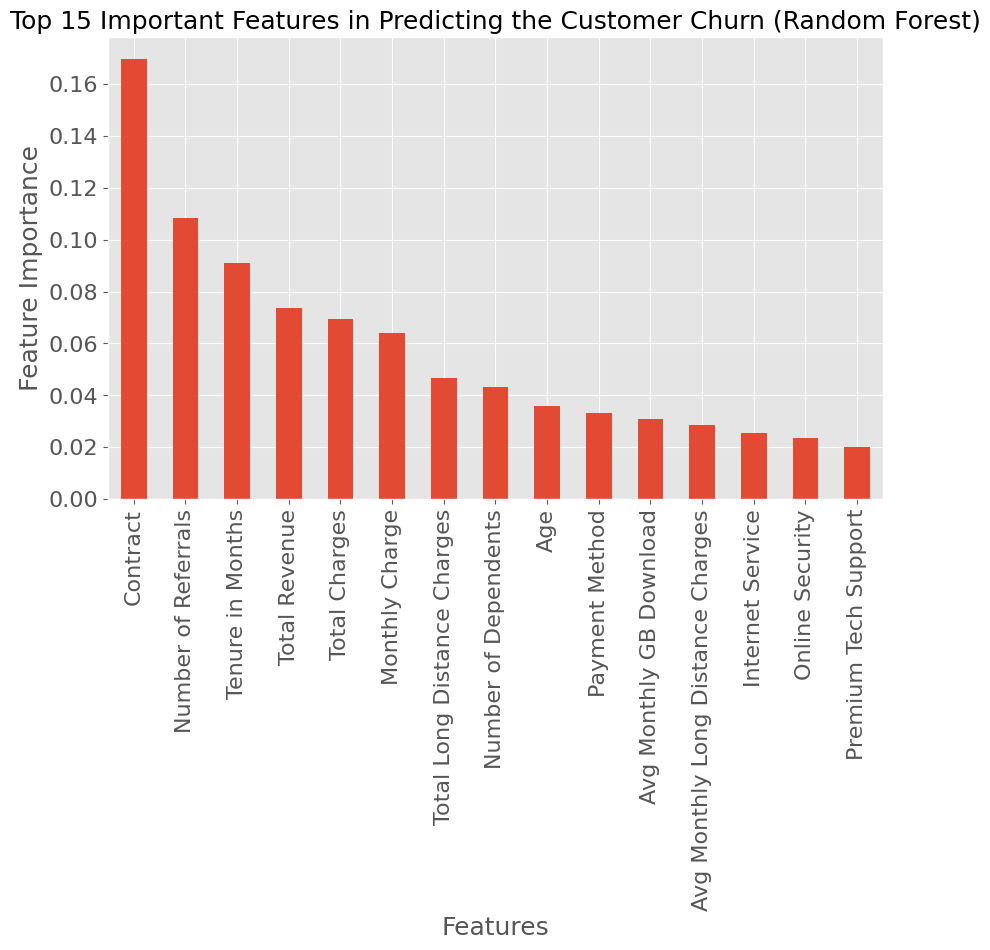

In [121]:
# Fit the model on the entire dataset (to get feature importances)
rf_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Getting the feature names
feature_names = X.columns

# Create a Series to hold the feature importances and their corresponding feature names
importances = pd.Series(feature_importances, index=feature_names)

# Sort the feature importances in descending order and select the top 15
top_15_importances = importances.sort_values(ascending=False).head(15)

# Plotting the top 15 important features
plt.figure(figsize=(10,6))
top_15_importances.plot(kind='bar')
plt.title('Top 15 Important Features in Predicting the Customer Churn (Random Forest)', fontsize=18)
plt.ylabel('Feature Importance', fontsize=18)
plt.xlabel('Features', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()


This highlights the top 15 factors influencing customer churn in a Random Forest model. "Contract" is the most significant predictor, followed by "Number of Referrals," "Tenure in Months," and "Total Revenue."

### **Gradient Boosting**

In [122]:
# Instantiate the Gradient Boosting model
gb_classifier = GradientBoostingClassifier(
    n_estimators=70,
    learning_rate=0.05,
    max_depth=5,
    min_samples_split=5,
    min_samples_leaf=4,
    subsample=0.7,
    random_state=42
)


In [123]:
# Define the k-fold cross-validation with 10 folds
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Calculate accuracy, precision, recall, and f1 score using cross-validation
accuracy_gb = cross_val_score(gb_classifier, X_train, y_train, cv=kf, scoring='accuracy')
precision_gb = cross_val_score(gb_classifier, X_train, y_train, cv=kf, scoring='precision')
recall_gb = cross_val_score(gb_classifier, X_train, y_train, cv=kf, scoring='recall')
f1_gb = cross_val_score(gb_classifier, X_train, y_train, cv=kf, scoring='f1')

# Print the average of the scores
print(f"Cross-Validated Accuracy: {accuracy_gb.mean():.4f}")
print(f"Cross-Validated Precision: {precision_gb.mean():.4f}")
print(f"Cross-Validated Recall: {recall_gb.mean():.4f}")
print(f"Cross-Validated F1 Score: {f1_gb.mean():.4f}")


Cross-Validated Accuracy: 0.8877
Cross-Validated Precision: 0.8997
Cross-Validated Recall: 0.8730
Cross-Validated F1 Score: 0.8860


The Gradient Boosting model averages an accuracy of 89%, with a precision of 90%. The recall was 88%, reflecting strong performance in identifying churn cases. The F1 score of 89% indicates a well-balanced model between precision and recall, ensuring reliable predictions.

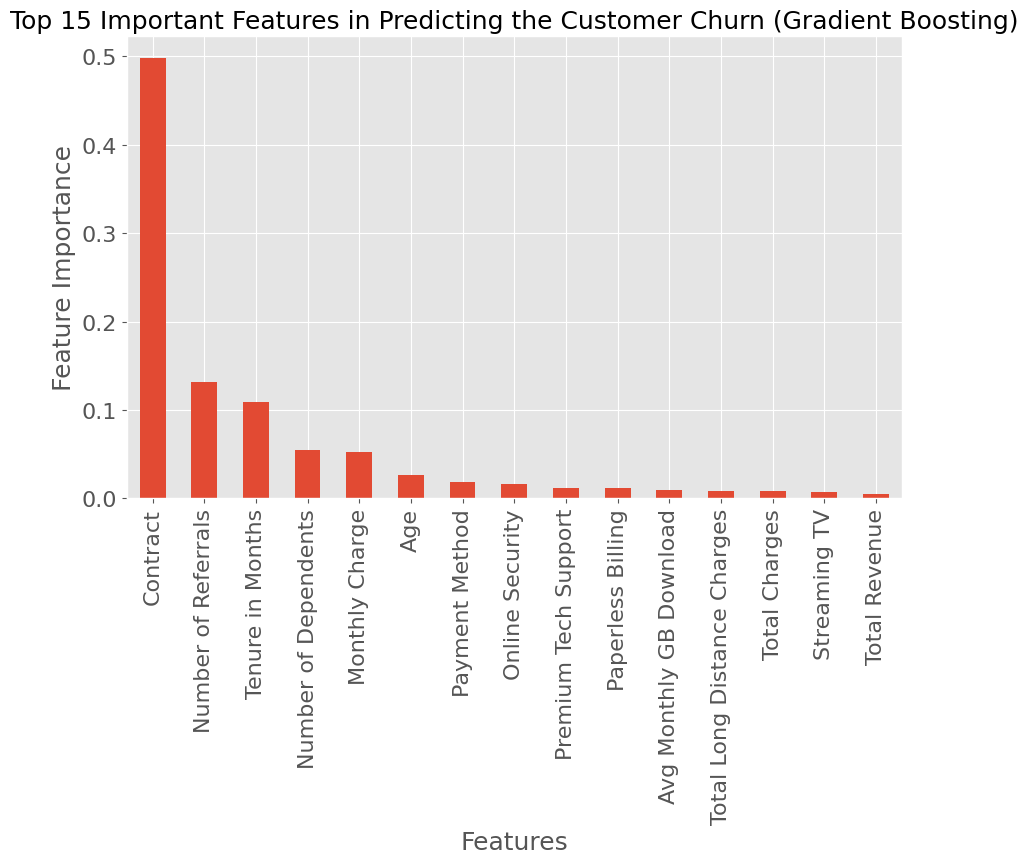

In [124]:
# Fit the model using cross-validation and calculate feature importances
gb_classifier.fit(X_train, y_train)
feature_importances_gb = gb_classifier.feature_importances_

# Getting the feature names
feature_names_gb = X.columns

# Create a Series to hold the feature importances and their corresponding feature names
importances_gb = pd.Series(feature_importances_gb, index=feature_names_gb)

# Sort the feature importances in descending order and select the top 15
top_15_importances_gb = importances_gb.sort_values(ascending=False).head(15)

# Plotting
plt.figure(figsize=(10,6))
top_15_importances_gb.plot(kind='bar')
plt.title('Top 15 Important Features in Predicting the Customer Churn (Gradient Boosting)', fontsize=18)
plt.ylabel('Feature Importance', fontsize=18)
plt.xlabel('Features', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()


Here we can see again that contract is the most prominent feature where number of referrals is second, and tenure in months being a close third. Contract and tenure features being the top 3 further support both the hypothesis about longer subscriptions reducing churn, and higher monthly bills increasing churn, indicated how significant these factors are to predicting churn.

### **XGBoost**

In [125]:
# Instantiate the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    max_depth=8,  # Reduced depth to avoid overfitting
    learning_rate=0.01,  # Slower learning rate for better accuracy
    subsample=0.8,  # Reduce to avoid overfitting
    colsample_bytree=0.8,  # Reduce to ensure diversity among trees
    n_estimators=1000,  # More estimators with lower learning rate
    reg_alpha=0.1,  # L1 regularization (alpha) to reduce overfitting
    reg_lambda=1,  # L2 regularization (lambda) to reduce overfitting
    seed=42
)


In [126]:
# Define the k-fold cross-validation with 10 folds
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Calculate accuracy, precision, recall, and f1 score using cross-validation
accuracy_xgb = cross_val_score(xgb_classifier, X_train, y_train, cv=kf, scoring='accuracy')
precision_xgb = cross_val_score(xgb_classifier, X_train, y_train, cv=kf, scoring='precision')
recall_xgb = cross_val_score(xgb_classifier, X_train, y_train, cv=kf, scoring='recall')
f1_xgb = cross_val_score(xgb_classifier, X_train, y_train, cv=kf, scoring='f1')

# Print the average of the scores
print(f"Cross-Validated Accuracy: {accuracy_xgb.mean():.4f}")
print(f"Cross-Validated Precision: {precision_xgb.mean():.4f}")
print(f"Cross-Validated Recall: {recall_xgb.mean():.4f}")
print(f"Cross-Validated F1 Score: {f1_xgb.mean():.4f}")


Cross-Validated Accuracy: 0.9097
Cross-Validated Precision: 0.9095
Cross-Validated Recall: 0.9100
Cross-Validated F1 Score: 0.9097


The XGBoost model averages an approximate accuracy of 91%, with a precision of 91%. The recall was 91%, indicating strong effectiveness in identifying actual churn cases. The F1 score of 91% reflects a good balance between precision and recall, confirming the model's reliability in predicting customer churn.

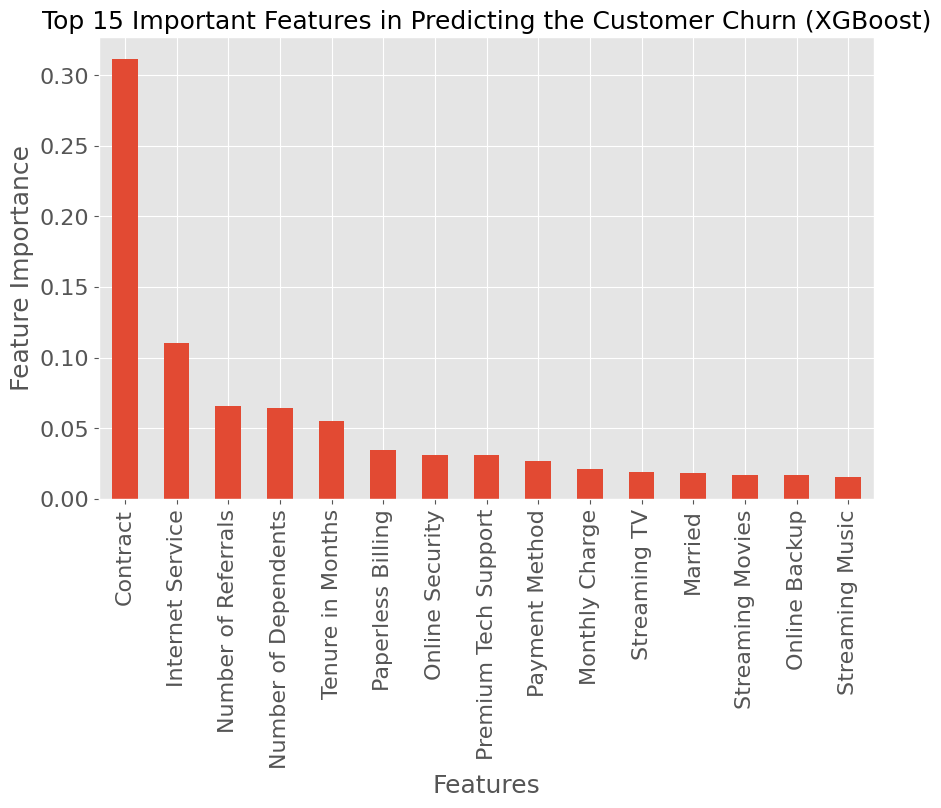

In [127]:
# Fit the XGBoost model on the training data
xgb_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances_xgb = xgb_classifier.feature_importances_

# Getting the feature names
feature_names_xgb = X_train.columns

# Create a Series to hold the feature importances and their corresponding feature names
importances_xgb = pd.Series(feature_importances_xgb, index=feature_names_xgb)

# Sort the feature importances in descending order and select the top 15
top_15_importances_xgb = importances_xgb.sort_values(ascending=False).head(15)

# Plotting
plt.figure(figsize=(10, 6))
top_15_importances_xgb.plot(kind='bar')
plt.title('Top 15 Important Features in Predicting the Customer Churn (XGBoost)', fontsize=18)
plt.ylabel('Feature Importance', fontsize=18)
plt.xlabel('Features', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()



Here we see a change in feature importance; contract remains as the top feature yet the second feature is internet service which from our analysis earlier had a high churn rate, possibly due to poor connection and disconnection rates, suggesting that this feature significantly affects churn as customers seek out better connection speeds from competitors. Third is number of dependents and fourth is number of referrals. This could suggest that customers with more dependents might be either more or less likely to churn, potentially influenced by financial responsibilities or the necessity for reliable services to support their dependents. Tenure in months is also a close 5th again.

**Visualisation Insight:**
All models closely compete in exceptional AUC values, but Gradient Boosting and XGBoost come out with the greatest AUC of 0.93. This indicates that the models are highly effective at distinguishing between customers who are likely to churn and those who are not, demonstrating strong predictive performance and reliability.








## **Final Model on the Test Data - XGBoost**

Due to the XGBoost Model being the most effective algorithm on the validation set, I chose this model to perform on my test data.

XGBoost - Accuracy: 0.8816
XGBoost - Precision: 0.9142
XGBoost - Recall: 0.9219
XGBoost - F1 Score: 0.9181


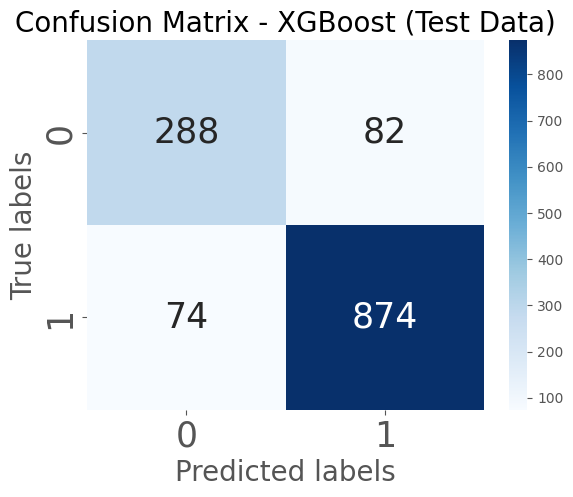

In [128]:
#Using the same xgb_model as it gave the best accuracy during k fold validation

# Fit the model on the entire training data (X_train, y_train)
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_xgb = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

# Print evaluation metrics
print(f"XGBoost - Accuracy: {accuracy_xgb:.4f}")
print(f"XGBoost - Precision: {precision_xgb:.4f}")
print(f"XGBoost - Recall: {recall_xgb:.4f}")
print(f"XGBoost - F1 Score: {f1_xgb:.4f}")

# Confusion matrix
confusion_mat_xgb = confusion_matrix(y_test, y_pred_xgb)

# Plotting the confusion matrix

sns.heatmap(confusion_mat_xgb, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 25})
plt.xlabel('Predicted labels', fontsize=20)
plt.ylabel('True labels', fontsize=20)
plt.title('Confusion Matrix - XGBoost (Test Data)', fontsize=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()


**0 = customers churned, 1 = customers stayed**

**Visualisation Insights**
(Figures change very slightly each run)

* True Positives (TP): 874 stayed customers were correctly predicted as stayed.
* True Negatives (TN): 288 churned customers were correctly predicted as churned.
* False Positives (FP): 82 churned customers were incorrectly predicted as stayed.
* False Negatives (FN): 74 stayed customers were incorrectly predicted as churned.

The XGBoost model, when tested on the test set, shows strong predictive performance with an accuracy of 88%,. The model's precision is 91%, indicating a high proportion of correct positive predictions. The recall is 92%, demonstrating its effectiveness in identifying actual churn cases. The F1 Score of 92% reflects a balanced performance between precision and recall, confirming the model's reliability in predicting customer churn.

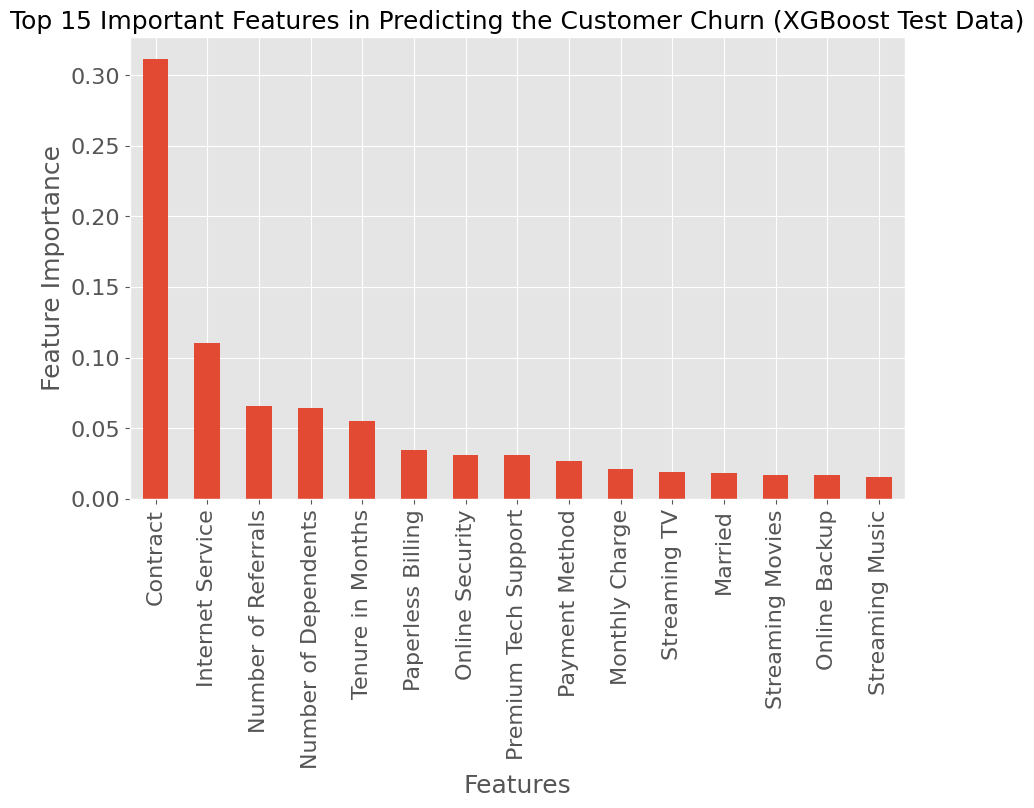

In [129]:
feature_importances_xgb = xgb_classifier.feature_importances_
feature_names_xgb = X_train.columns
importances_xgb = pd.Series(feature_importances_xgb, index=feature_names_xgb)
top_15_importances_xgb = importances_xgb.sort_values(ascending=False).head(15)

plt.figure(figsize=(10,6))
top_15_importances_xgb.plot(kind='bar')
plt.title('Top 15 Important Features in Predicting the Customer Churn (XGBoost Test Data)', fontsize=18)
plt.ylabel('Feature Importance', fontsize=18)
plt.xlabel('Features', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

Feature importance chart on the XGBoost model for validation and test data is identical.

MCC value: 0.7050467233704085
ROC-AUC value: 0.9334587752309271


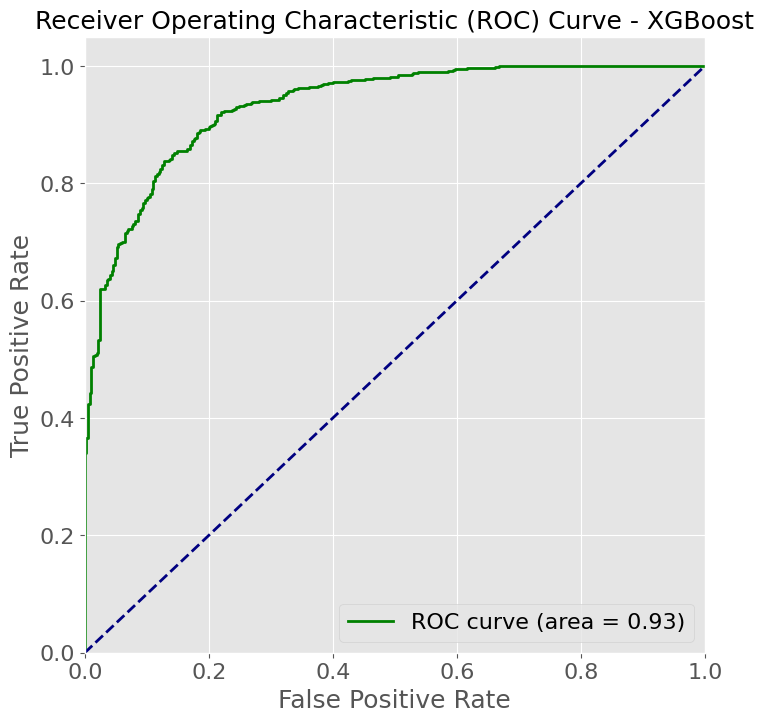

In [130]:
# Get the probability scores for the positive class (class 1) from XGBoost model
y_probs_xgb = xgb_classifier.predict_proba(X_test)[:, 1]

# Calculate Matthews Correlation Coefficient (MCC)
mcc_xgb = matthews_corrcoef(y_test, y_pred_xgb)
print("MCC value:", mcc_xgb)

# Calculate ROC-AUC
roc_auc_xgb = roc_auc_score(y_test, y_probs_xgb)
print("ROC-AUC value:", roc_auc_xgb)

# Compute the ROC curve
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_probs_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr_xgb, tpr_xgb, color='green', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_xgb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver Operating Characteristic (ROC) Curve - XGBoost', fontsize=18)
plt.legend(loc="lower right", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

The ROC (Receiver Operating Characteristic) curve for the XGBoost model highlights its strong classification capability. With an ROC-AUC score of 0.94, the model shows excellent performance in differentiating between customers who are likely to churn and those who will stay. This high AUC value reflects the model's ability to balance sensitivity (the true positive rate) against specificity (the false positive rate) effectively.

Moreover, the Matthews Correlation Coefficient (MCC) of 0.7 indicates a robust overall agreement between the predicted outcomes and the actual results. The MCC value, close to 1, suggests that the XGBoost model is reliable and accurate in forecasting customer churn.

## **Conclusion**

Machine learning models can effectively analyze data by incorporating key features into their predictions. By understanding the relationship between these features and customer churn, these models can deliver more accurate forecasts. XGBoost, in particular, has shown to be a highly effective tool for predicting customer churn in a business environment. This capability allows businesses to anticipate customer churn and take proactive steps to retain customers, ultimately enhancing customer satisfaction and loyalty.

## **Recommendations**
Based on the analysis, here are some recommendations:
- **Focus on High-Value Customers:** Company should direct their marketing resources towards the top third of their customer base, who are identified as substantial spenders and are loyal to our brand. For these customers, an exclusive loyalty program could be designed, providing them with unique benefits and rewards.

- **Establish a competitive advantage** Customers are willing to invest in quality products and services. To prevent customer churn, it is crucial to meet their expectations consistently and provide superior offerings compared to competitors.

- **Promote Long-Term Subscriptions:** The data shows that transitioning month-to-month users to long-term contractual subscribers can effectively decrease churn rates. Thus, company should promote the benefits of long-term subscriptions, illustrating the added value they provide.

- **Promote Online Security:** •	Users with online security have lower churn rates, implying a revenue opportunity by upselling this service. Targeted offers could boost adoption, reduce churn, and increase satisfaction.

- **Leverage the Number of Dependents:** Customers with multiple dependents may have different service needs or financial considerations. The company should consider developing targeted strategies, such as family plans or discounts, to better cater to these customers and reduce their likelihood of churning.

- **Encourage Referrals:** Customers who refer others tend to be more engaged and loyal. The company should implement or enhance referral programs that reward customers for bringing in new clients, thereby creating a positive feedback loop that supports customer retention.

- **Upsell Internet and Streaming Services:** Customers using the internet services have shown a propensity to become high-value customers when they purchase additional internet and streaming services. company should consider devising strategies to promote these add-ons to thier existing internet user base.

- **Re-evaluate Offer E:** The analysis shows that Offer E has a high churn rate. We recommend conducting a detailed assessment of this offer to identify potential issues. By comparing it with other successful offerings, company could make necessary modifications to enhance its performance.

- **Be proactive in preventing churn:** Regularly conduct surveys to identify early signs of customer churn among loyal customers. Make customers feel valued and heard by involving them in the company's decision-making process. Use survey feedback to design better service plans that cater to their specific needs and preferences.